
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

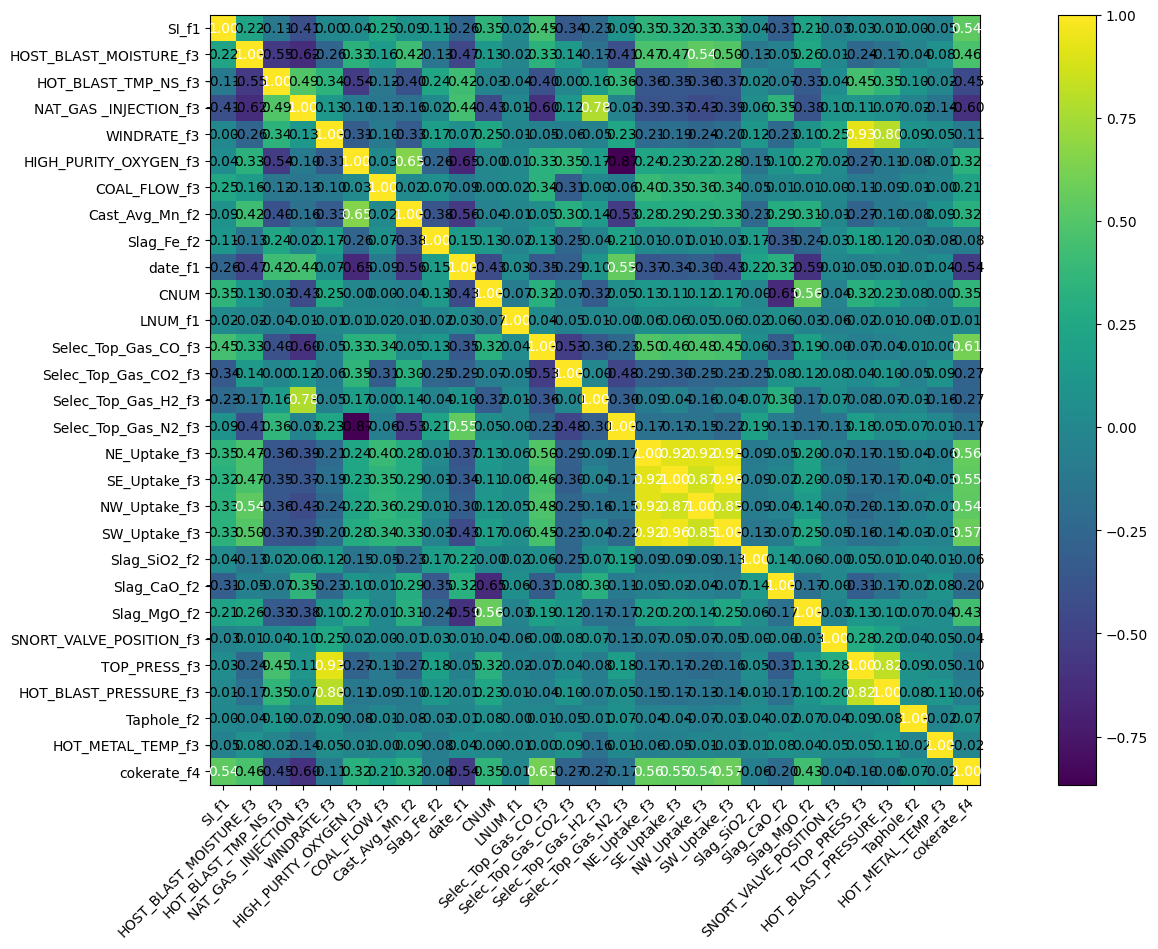

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

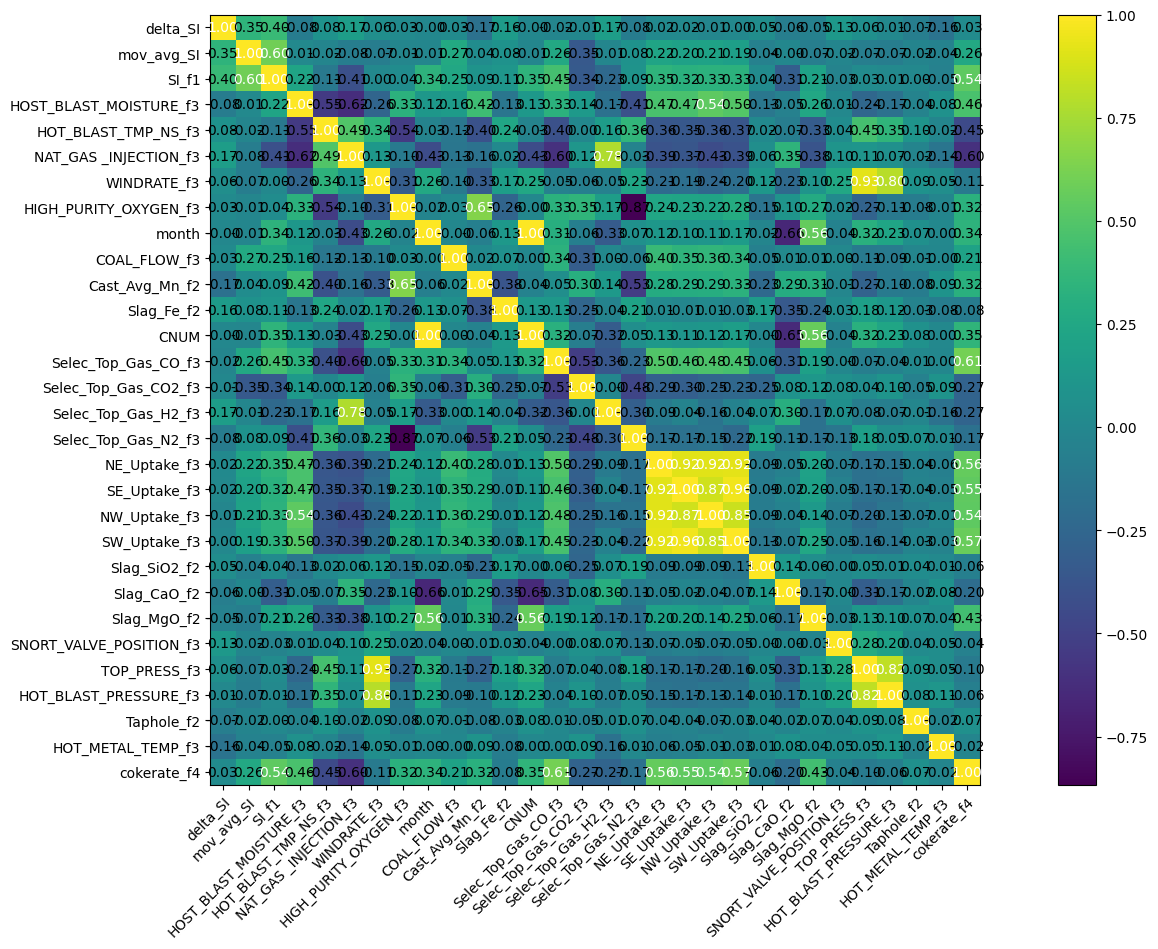

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        ## [B, 10, 35],  [B, 10, 1]
        ## idx_pred,     pred_si 
        
       
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## print(pred_si.shape)
        ## print(y_si.shape)
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 0.7
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.449673
Loss_SI: 0.29996156692504883 Loss_all: 0.7990009188652039
===
[200] Train Loss: 0.096972
Loss_SI: 0.05394752323627472 Loss_all: 0.1973612755537033
===
[400] Train Loss: 0.036430
Loss_SI: 0.018891867250204086 Loss_all: 0.07735322415828705
===
[600] Train Loss: 0.021687
Loss_SI: 0.011224722489714622 Loss_all: 0.04609953612089157
===
[800] Train Loss: 0.019396
Loss_SI: 0.009787778370082378 Loss_all: 0.04181450977921486
===


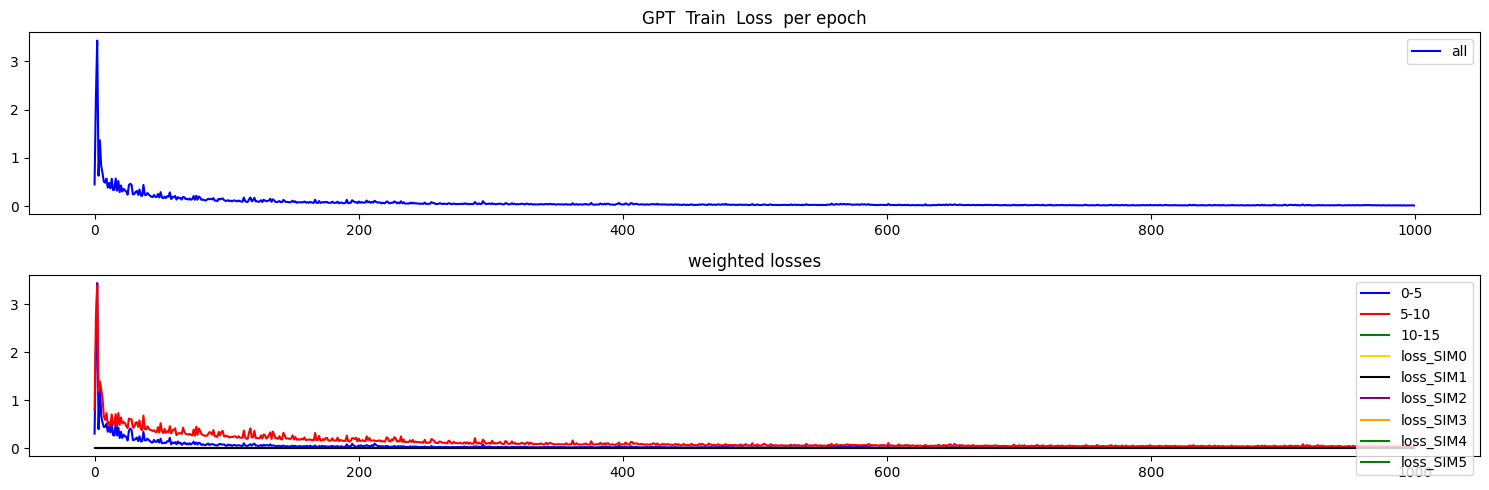

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


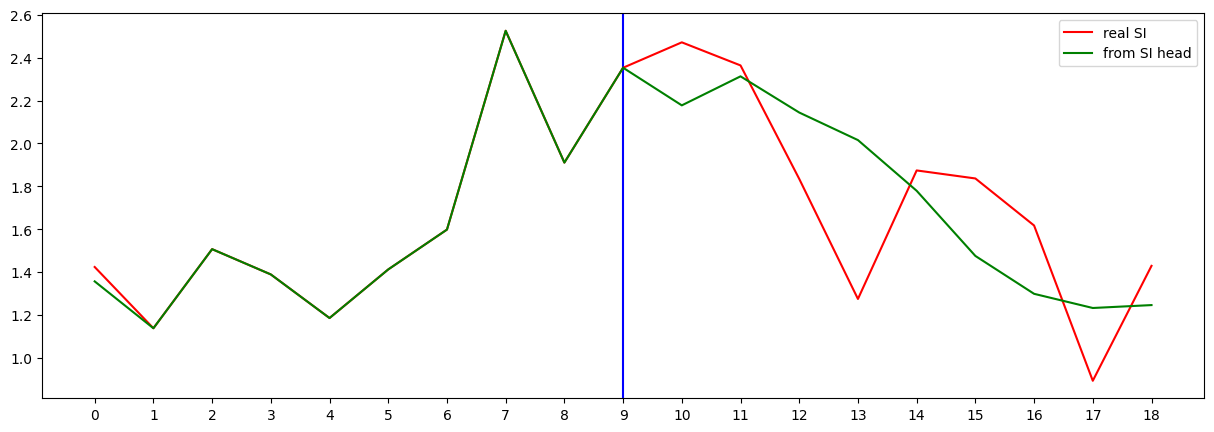

Testing R**2 - (all) - (no inputs):  0.7471171990250332
Testing R**2 - (f2) - SI full (no inputs):  0.20450332146773553
Testing R**2 - SI head only (no inputs):  0.09475576954148857
0 ...index R**2 (no inputs):  -0.33124341703202975
1 ...index R**2 (no inputs):  -0.21537805410641275
2 ...index R**2 (no inputs):  0.20450332146773553
3 ...index R**2 (no inputs):  -790.7540806278871
4 ...index R**2 (no inputs):  -177.28974870189333
5 ...index R**2 (no inputs):  -7202.377420077748
6 ...index R**2 (no inputs):  -109.14154106610805
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5874339762912792
10 ...index R**2 (no inputs):  -0.8806703379302305
11 ...index R**2 (no inputs):  -750.5379968092681
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3066714841064877
16 ...index R**2 (no inputs):  -3.5310037622291883
17 ...index R**2 (no inputs):  -433.615023

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.651368
Loss_SI: 0.500605046749115 Loss_all: 1.0031479597091675
===
[200] Train Loss: 0.118623
Loss_SI: 0.06327715516090393 Loss_all: 0.24776418507099152
===
[400] Train Loss: 0.108253
Loss_SI: 0.06804782152175903 Loss_all: 0.20206446945667267
===
[600] Train Loss: 0.064374
Loss_SI: 0.02559242770075798 Loss_all: 0.15486297011375427
===
[800] Train Loss: 0.065284
Loss_SI: 0.030988600105047226 Loss_all: 0.145307719707489
===


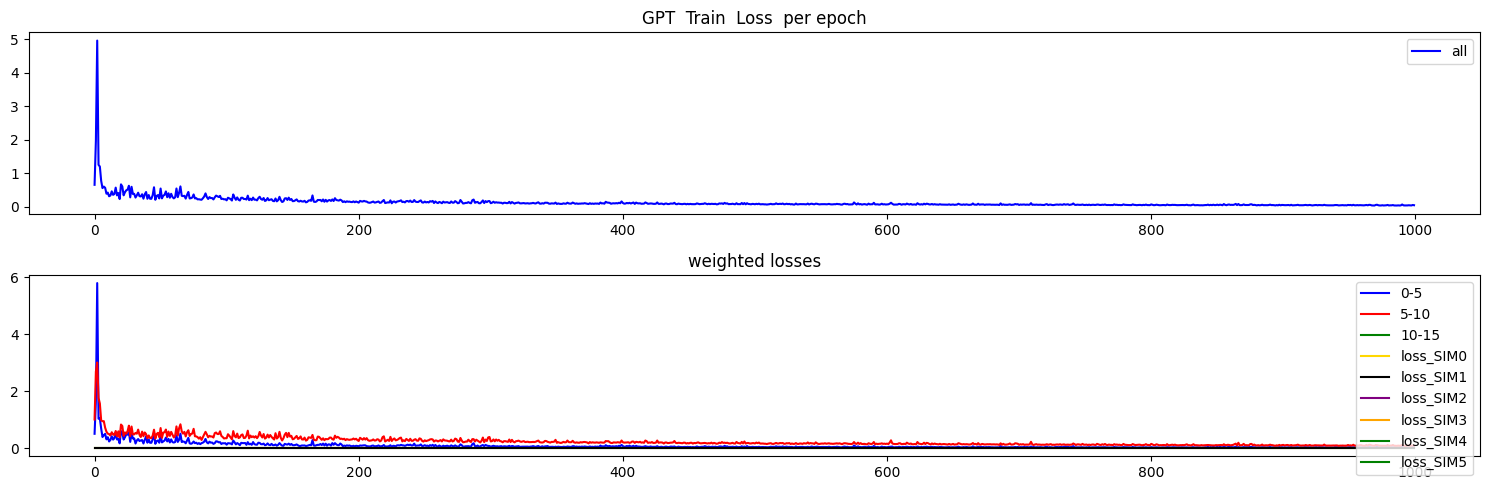

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


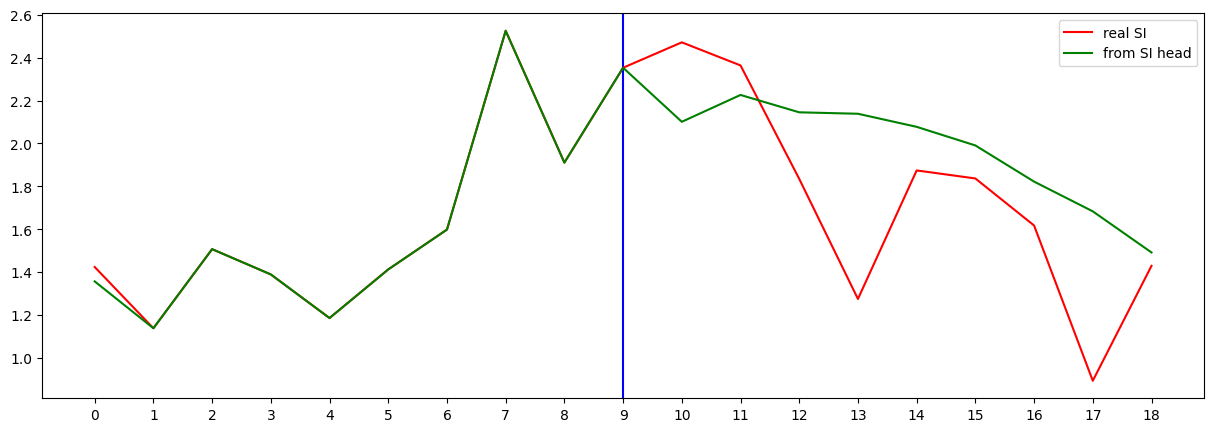

Testing R**2 - (all) - (no inputs):  0.49858053470901675
Testing R**2 - (f2) - SI full (no inputs):  -0.12276206090173614
Testing R**2 - SI head only (no inputs):  -0.5204434786061174
0 ...index R**2 (no inputs):  -0.178662387389815
1 ...index R**2 (no inputs):  -0.7901329885868369
2 ...index R**2 (no inputs):  -0.12276206090173614
3 ...index R**2 (no inputs):  -317.3483822200128
4 ...index R**2 (no inputs):  -229.8068440244691
5 ...index R**2 (no inputs):  -14306.334898017865
6 ...index R**2 (no inputs):  -194.8017360191368
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5727492935479108
10 ...index R**2 (no inputs):  -0.496062586158905
11 ...index R**2 (no inputs):  -513.5137795053503
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6188089260696399
16 ...index R**2 (no inputs):  0.039109772673931786
17 ...index R**2 (no inputs):  -1030.338032

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.848206
Loss_SI: 0.6914622187614441 Loss_all: 1.2139430046081543
===
[200] Train Loss: 0.242445
Loss_SI: 0.15398983657360077 Loss_all: 0.44883963465690613
===
[400] Train Loss: 0.094222
Loss_SI: 0.04364383965730667 Loss_all: 0.21223656833171844
===
[600] Train Loss: 0.092124
Loss_SI: 0.0481613427400589 Loss_all: 0.1947050839662552
===
[800] Train Loss: 0.086088
Loss_SI: 0.05277770012617111 Loss_all: 0.16381146013736725
===


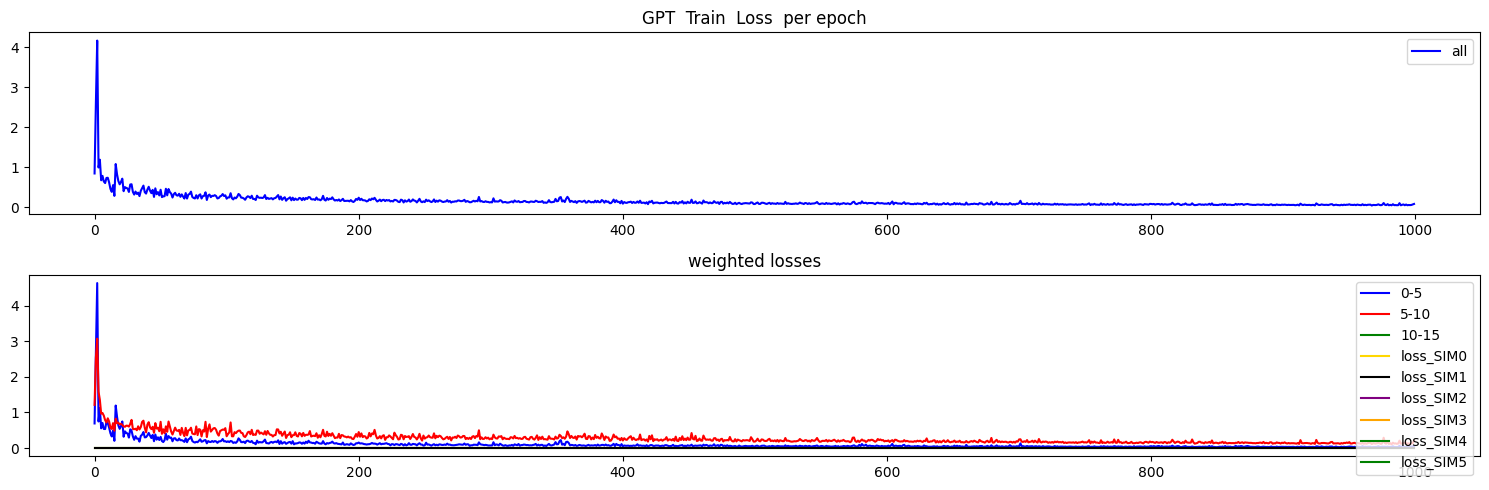

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


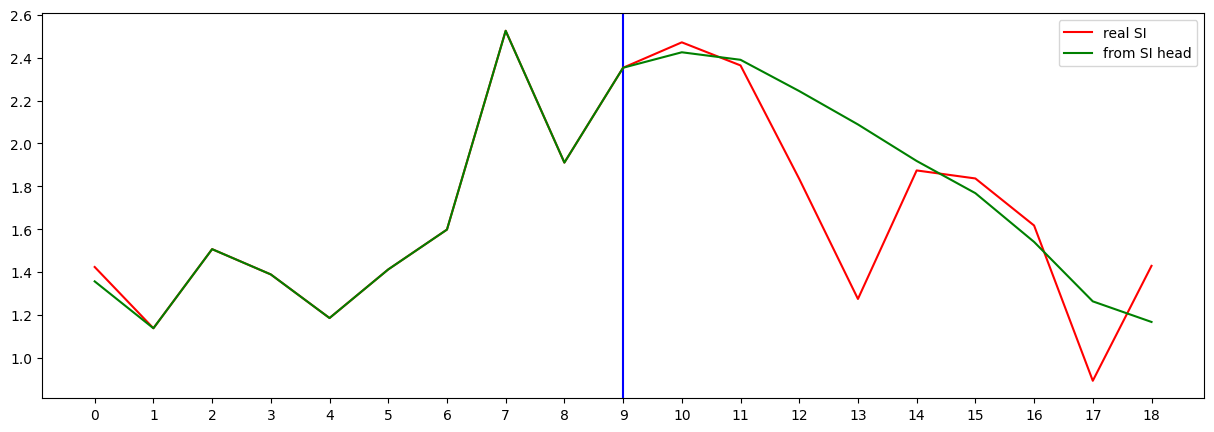

Testing R**2 - (all) - (no inputs):  0.6045123685399385
Testing R**2 - (f2) - SI full (no inputs):  -0.29753105509225586
Testing R**2 - SI head only (no inputs):  -0.28382334016279964
0 ...index R**2 (no inputs):  -0.8400841295088661
1 ...index R**2 (no inputs):  -1.0517467952646928
2 ...index R**2 (no inputs):  -0.29753105509225586
3 ...index R**2 (no inputs):  -3123.820486270071
4 ...index R**2 (no inputs):  -6066.791941187476
5 ...index R**2 (no inputs):  -11276.17611204736
6 ...index R**2 (no inputs):  -72.92183549133662
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5142757091046837
10 ...index R**2 (no inputs):  -1.0963500588367174
11 ...index R**2 (no inputs):  -528.7877907707098
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.340124628811271
16 ...index R**2 (no inputs):  -1.3000623174216512
17 ...index R**2 (no inputs):  -8092.6539289

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.700732
Loss_SI: 0.47243165969848633 Loss_all: 1.2334336042404175
===
[200] Train Loss: 0.218008
Loss_SI: 0.14107906818389893 Loss_all: 0.39750880002975464
===
[400] Train Loss: 0.165367
Loss_SI: 0.11096389591693878 Loss_all: 0.2923082709312439
===
[600] Train Loss: 0.130791
Loss_SI: 0.08319837599992752 Loss_all: 0.24184179306030273
===
[800] Train Loss: 0.110925
Loss_SI: 0.05541243404150009 Loss_all: 0.24045588076114655
===


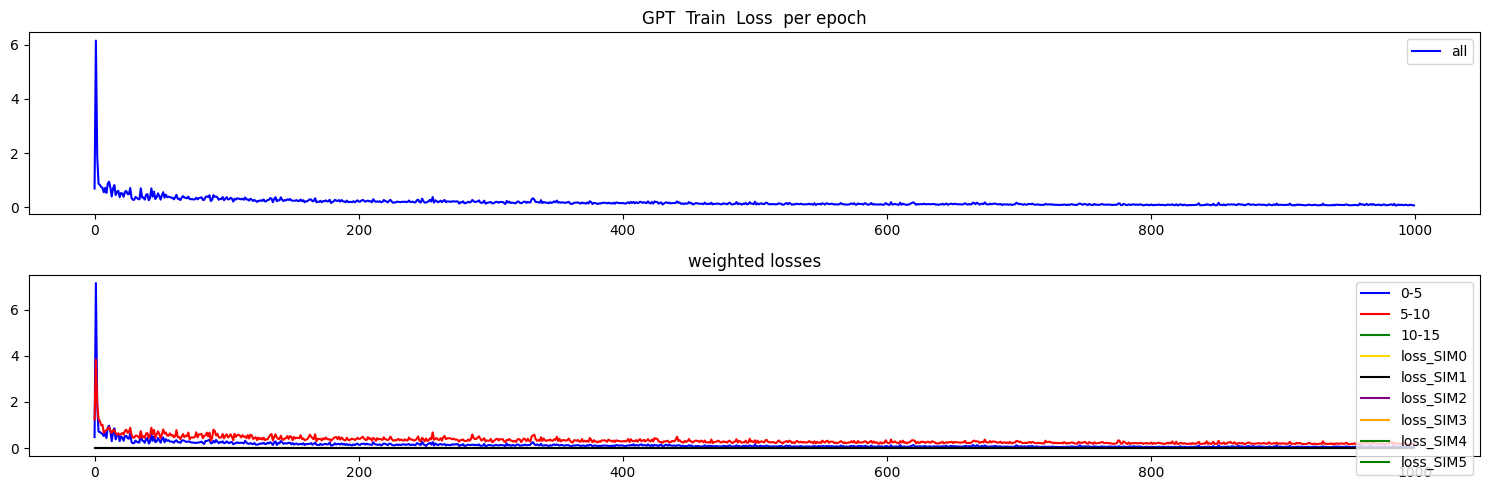

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


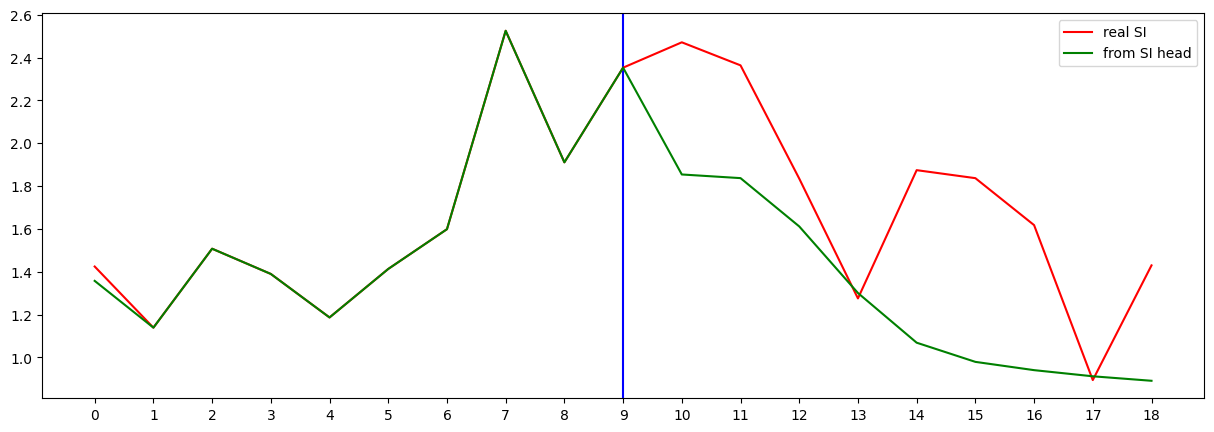

Testing R**2 - (all) - (no inputs):  0.6429337463476563
Testing R**2 - (f2) - SI full (no inputs):  -0.5293548474875955
Testing R**2 - SI head only (no inputs):  -0.5756234999704966
0 ...index R**2 (no inputs):  -0.21011711210584827
1 ...index R**2 (no inputs):  0.117481381870431
2 ...index R**2 (no inputs):  -0.5293548474875955
3 ...index R**2 (no inputs):  -6824.9663743024885
4 ...index R**2 (no inputs):  -5508.1101238156325
5 ...index R**2 (no inputs):  -10169.03164905313
6 ...index R**2 (no inputs):  -0.9670071239075353
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3102699160925757
10 ...index R**2 (no inputs):  -0.2917290369875791
11 ...index R**2 (no inputs):  -328.5974427665622
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.319854485595656
16 ...index R**2 (no inputs):  -0.24642747202777104
17 ...index R**2 (no inputs):  -5383.6252637

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.913417
Loss_SI: 0.7677268385887146 Loss_all: 1.2533611059188843
===
[200] Train Loss: 0.090761
Loss_SI: 0.03565588220953941 Loss_all: 0.2193409651517868
===
[400] Train Loss: 0.034595
Loss_SI: 0.016394440084695816 Loss_all: 0.07706180214881897
===
[600] Train Loss: 0.025333
Loss_SI: 0.01197478175163269 Loss_all: 0.05650103837251663
===
[800] Train Loss: 0.019581
Loss_SI: 0.008429429493844509 Loss_all: 0.04560140147805214
===


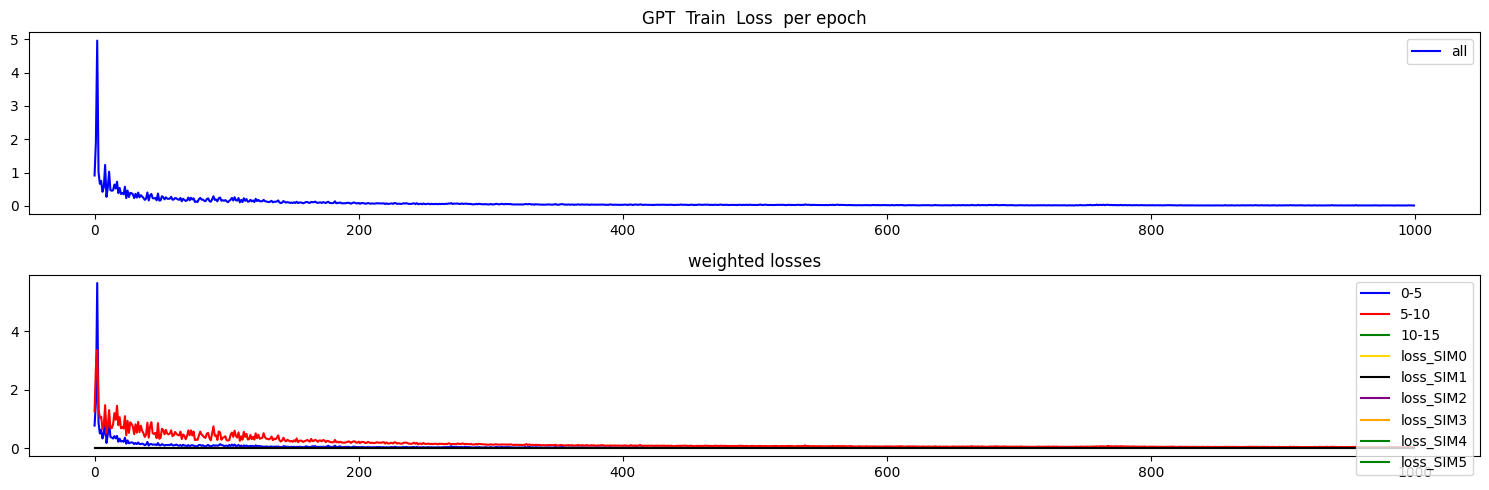

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


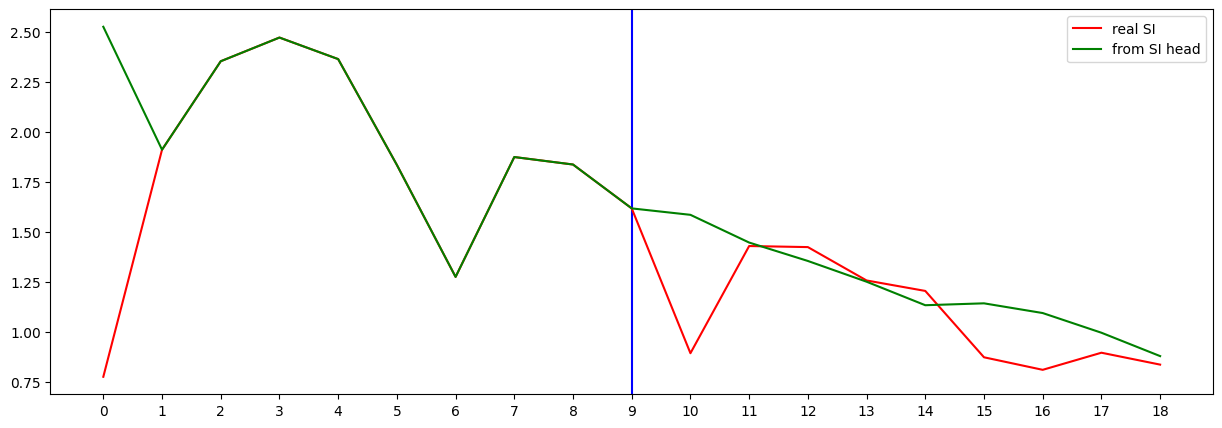

Testing R**2 - (all) - (no inputs):  0.997516207433457
Testing R**2 - (f2) - SI full (no inputs):  0.5689452844559231
Testing R**2 - SI head only (no inputs):  0.5028013608307352
0 ...index R**2 (no inputs):  -0.3554450646084968
1 ...index R**2 (no inputs):  -14.68398240408546
2 ...index R**2 (no inputs):  0.5689452844559231
3 ...index R**2 (no inputs):  -91.49167515678664
4 ...index R**2 (no inputs):  -0.0012526947332389682
5 ...index R**2 (no inputs):  -872.1368162917481
6 ...index R**2 (no inputs):  -0.838801854106664
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.703949813878525
10 ...index R**2 (no inputs):  -2.9681031298175333
11 ...index R**2 (no inputs):  -242.6462469669832
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.376788968467345
16 ...index R**2 (no inputs):  -5.65597489729458
17 ...index R**2 (no inputs):  -601.367442322095
18

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.091786
Loss_SI: 0.9341885447502136 Loss_all: 1.4595146179199219
===
[200] Train Loss: 0.209200
Loss_SI: 0.08633211255073547 Loss_all: 0.49589258432388306
===
[400] Train Loss: 0.136183
Loss_SI: 0.05451855808496475 Loss_all: 0.3267342448234558
===
[600] Train Loss: 0.071315
Loss_SI: 0.033180948346853256 Loss_all: 0.16029499471187592
===
[800] Train Loss: 0.046815
Loss_SI: 0.018190255388617516 Loss_all: 0.11360602080821991
===


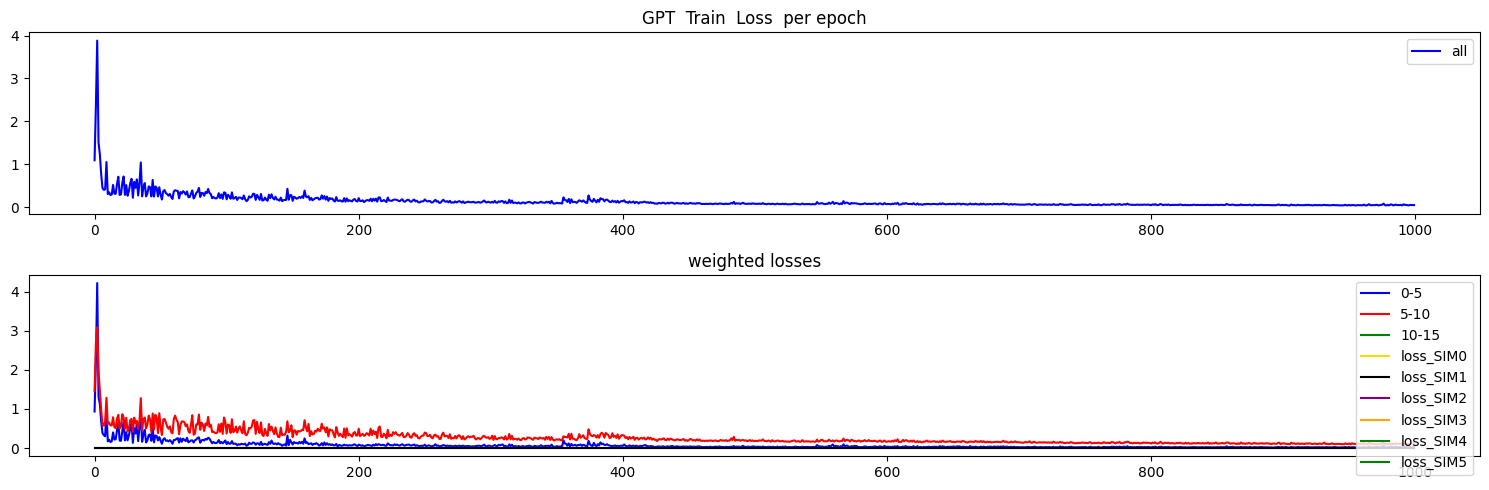

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


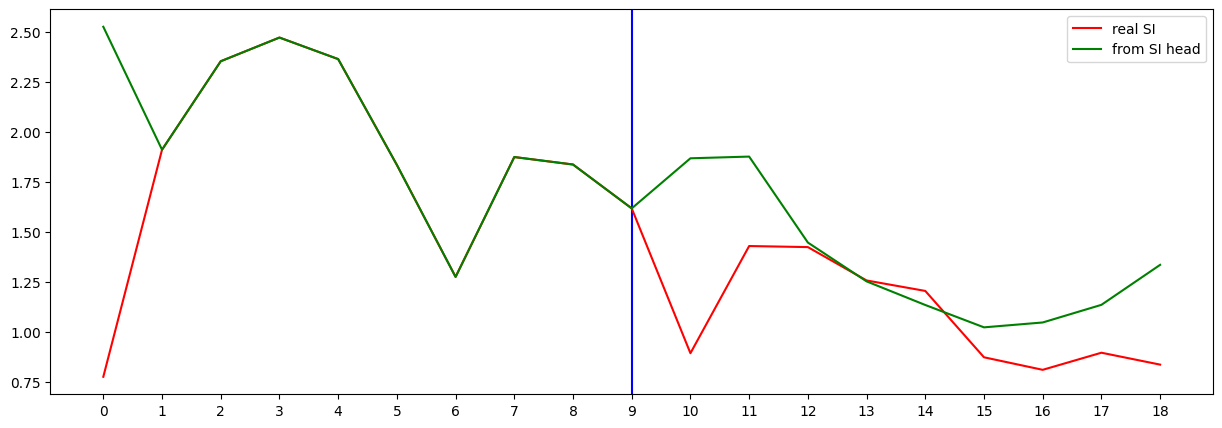

Testing R**2 - (all) - (no inputs):  0.9888752110188533
Testing R**2 - (f2) - SI full (no inputs):  -1.00342787319655
Testing R**2 - SI head only (no inputs):  -0.6692871652441765
0 ...index R**2 (no inputs):  0.23110487999663076
1 ...index R**2 (no inputs):  -17.1153758580181
2 ...index R**2 (no inputs):  -1.00342787319655
3 ...index R**2 (no inputs):  -428.0318514407835
4 ...index R**2 (no inputs):  -1.9354676683235374
5 ...index R**2 (no inputs):  -4044.056896051254
6 ...index R**2 (no inputs):  -6.093582479135623
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.1629059105804287
10 ...index R**2 (no inputs):  -0.8115775444930287
11 ...index R**2 (no inputs):  -453.81594564406873
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -12.360312843518969
16 ...index R**2 (no inputs):  -5.277392153034579
17 ...index R**2 (no inputs):  -276.41170529030336


In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.845835
Loss_SI: 0.757236659526825 Loss_all: 1.052562952041626
===
[200] Train Loss: 0.185208
Loss_SI: 0.13636064529418945 Loss_all: 0.2991854250431061
===
[400] Train Loss: 0.170327
Loss_SI: 0.0999441146850586 Loss_all: 0.33455508947372437
===
[600] Train Loss: 0.090476
Loss_SI: 0.044576600193977356 Loss_all: 0.19757415354251862
===
[800] Train Loss: 0.093892
Loss_SI: 0.05397641658782959 Loss_all: 0.18702800571918488
===


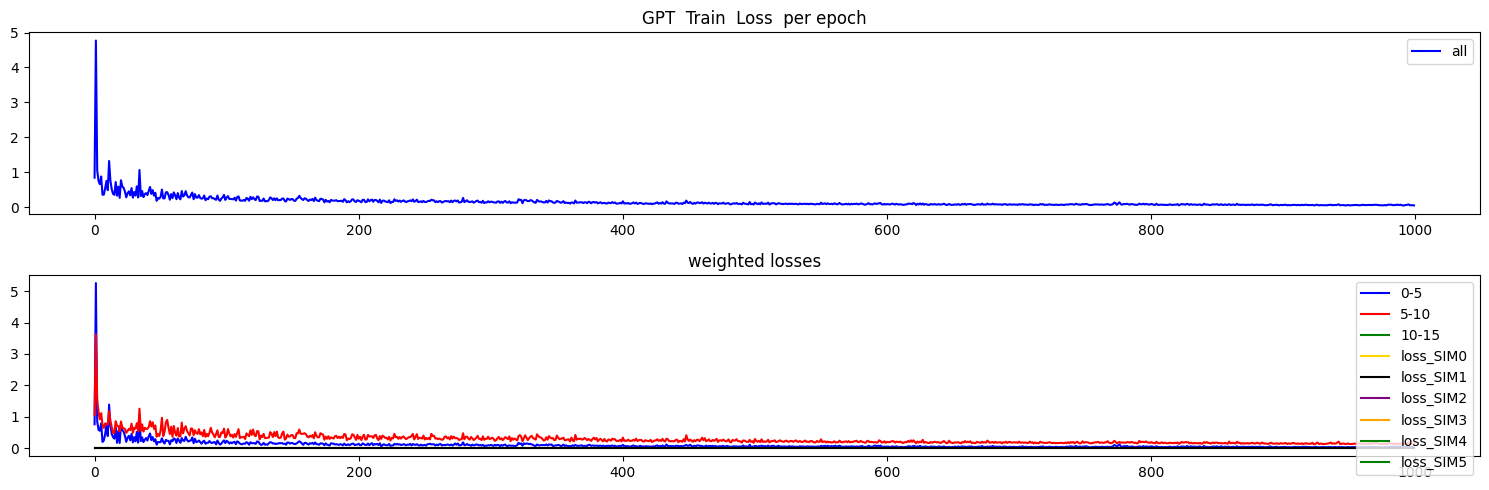

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


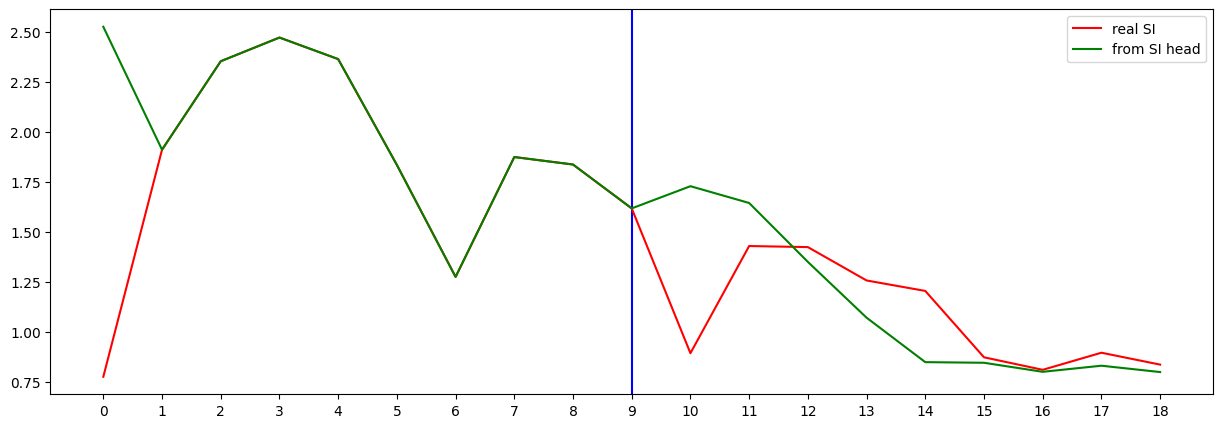

Testing R**2 - (all) - (no inputs):  0.9896497742080822
Testing R**2 - (f2) - SI full (no inputs):  0.3097527129809128
Testing R**2 - SI head only (no inputs):  0.6981417422468299
0 ...index R**2 (no inputs):  0.1472703576046578
1 ...index R**2 (no inputs):  -16.72338197663111
2 ...index R**2 (no inputs):  0.3097527129809128
3 ...index R**2 (no inputs):  -214.5743640784397
4 ...index R**2 (no inputs):  -7.105120944620943
5 ...index R**2 (no inputs):  -3738.2136022200093
6 ...index R**2 (no inputs):  -1.8103559357659669
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2272770050651243
10 ...index R**2 (no inputs):  -0.25998261131903266
11 ...index R**2 (no inputs):  -286.6559667828262
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -17.91072320995829
16 ...index R**2 (no inputs):  -4.058802584300709
17 ...index R**2 (no inputs):  -653.1727392054075


In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.446954
Loss_SI: 0.22231271862983704 Loss_all: 0.971116840839386
===
[200] Train Loss: 0.241127
Loss_SI: 0.18373249471187592 Loss_all: 0.37504586577415466
===
[400] Train Loss: 0.167911
Loss_SI: 0.09869222342967987 Loss_all: 0.32942235469818115
===
[600] Train Loss: 0.108937
Loss_SI: 0.04861300811171532 Loss_all: 0.24969364702701569
===
[800] Train Loss: 0.096998
Loss_SI: 0.04990781098604202 Loss_all: 0.2068750262260437
===


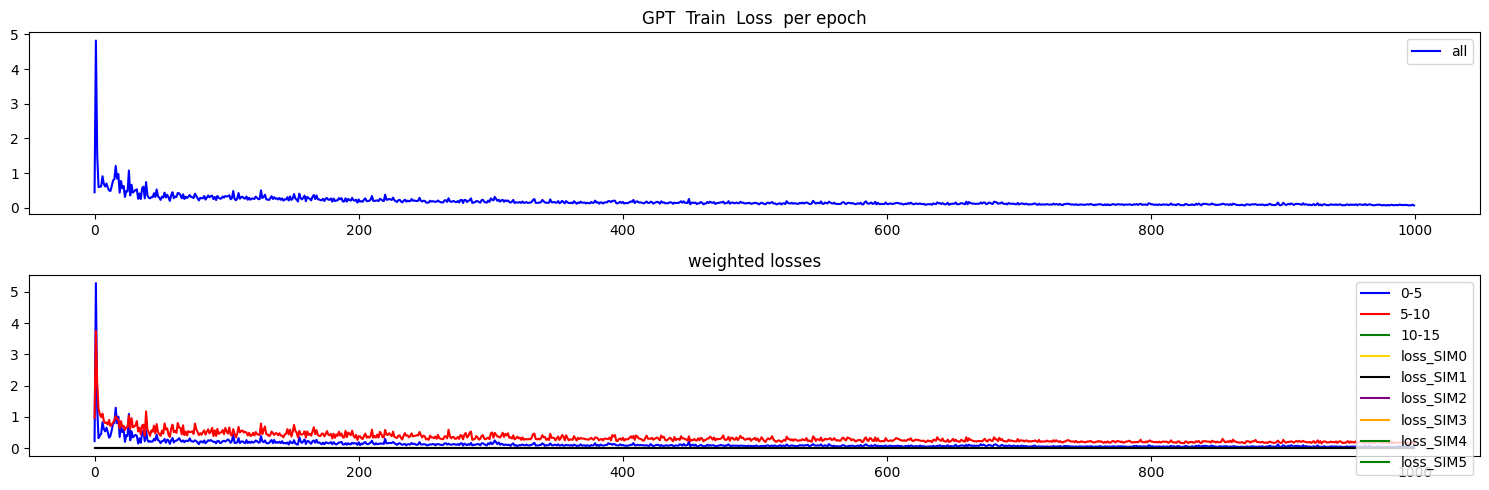

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


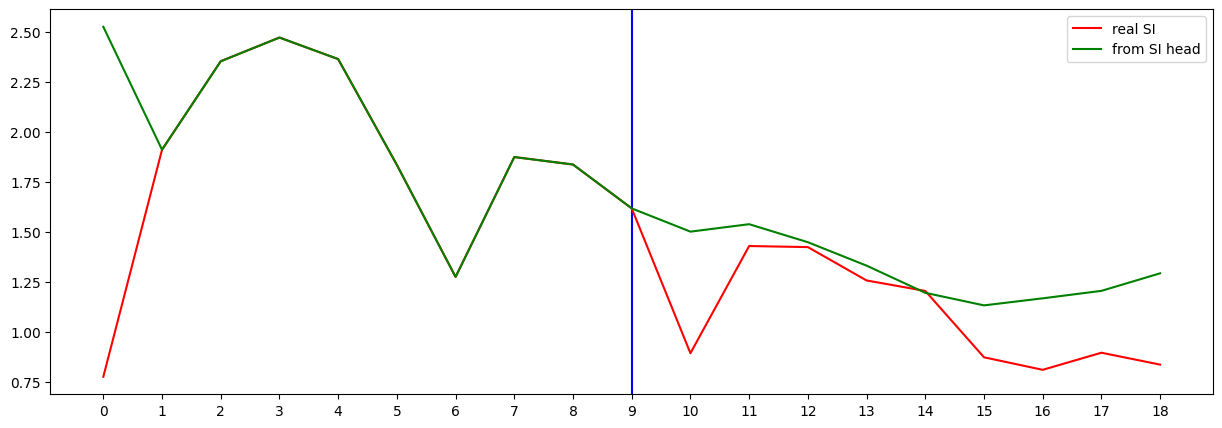

Testing R**2 - (all) - (no inputs):  0.8895496095292252
Testing R**2 - (f2) - SI full (no inputs):  -0.18595719585585524
Testing R**2 - SI head only (no inputs):  -0.29567012403883175
0 ...index R**2 (no inputs):  -0.19711412010555285
1 ...index R**2 (no inputs):  -19.444056773406622
2 ...index R**2 (no inputs):  -0.18595719585585524
3 ...index R**2 (no inputs):  -98.4288276769292
4 ...index R**2 (no inputs):  -6.01078247307594
5 ...index R**2 (no inputs):  -40475.86801886754
6 ...index R**2 (no inputs):  -9.356033655194796
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.8602529027664514
10 ...index R**2 (no inputs):  -1.1956426835410232
11 ...index R**2 (no inputs):  -280.2859697153524
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -24.90937299397427
16 ...index R**2 (no inputs):  -15.350838811119075
17 ...index R**2 (no inputs):  -98.1509671257

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.815537
Loss_SI: 0.6874979734420776 Loss_all: 1.1142958402633667
===
[200] Train Loss: 0.106907
Loss_SI: 0.05287380889058113 Loss_all: 0.2329849898815155
===
[400] Train Loss: 0.037449
Loss_SI: 0.015588251873850822 Loss_all: 0.08845838904380798
===
[600] Train Loss: 0.026289
Loss_SI: 0.015327959321439266 Loss_all: 0.05186324566602707
===
[800] Train Loss: 0.020480
Loss_SI: 0.011870242655277252 Loss_all: 0.0405687615275383
===


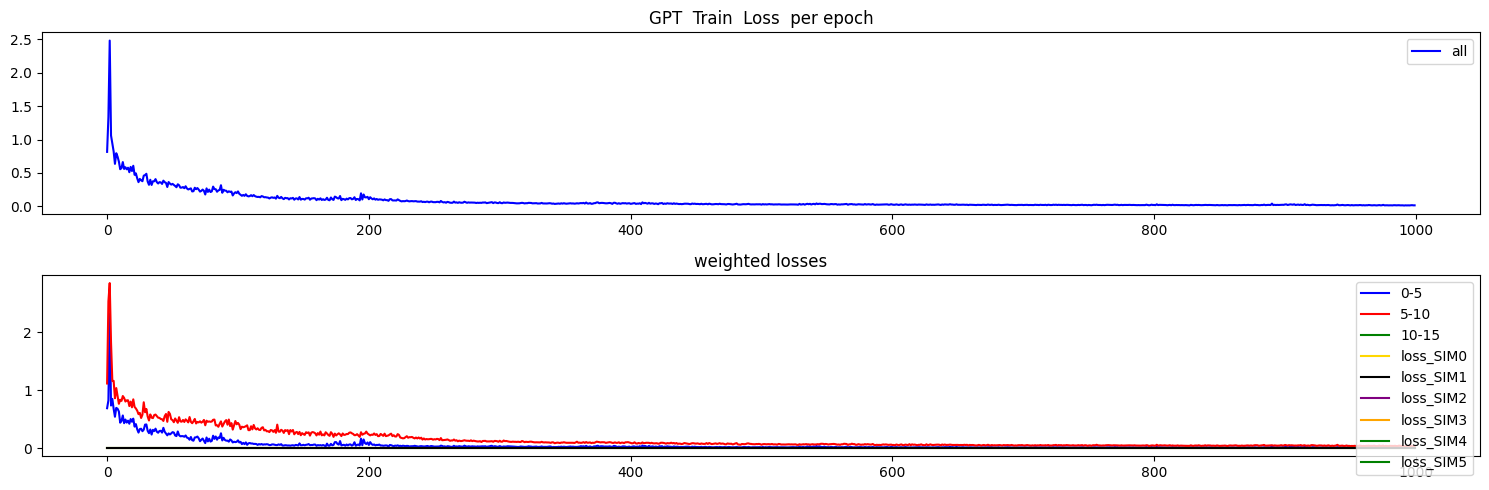

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


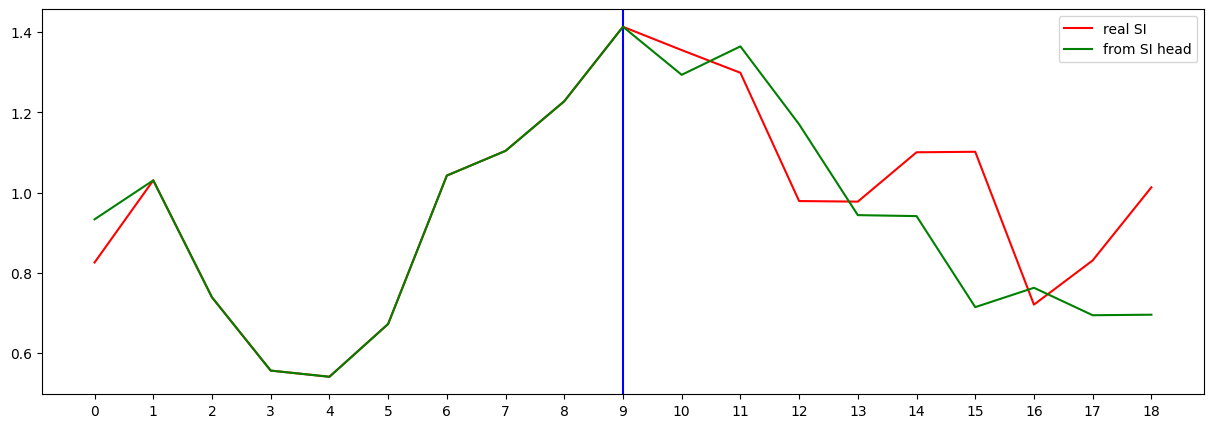

Testing R**2 - (all) - (no inputs):  0.8662487306355893
Testing R**2 - (f2) - SI full (no inputs):  -1.2926351117748083
Testing R**2 - SI head only (no inputs):  -0.46547124257076256
0 ...index R**2 (no inputs):  -0.8733633386329882
1 ...index R**2 (no inputs):  0.16298319016802654
2 ...index R**2 (no inputs):  -1.2926351117748083
3 ...index R**2 (no inputs):  -23.776692509251934
4 ...index R**2 (no inputs):  0.08783643409758135
5 ...index R**2 (no inputs):  -10.846197041617675
6 ...index R**2 (no inputs):  -20.576853433181636
7 ...index R**2 (no inputs):  -25.43739822736185
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.5253073797914367
10 ...index R**2 (no inputs):  -3.384983739971588
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3305546550598164
16 ...index R**2 (no inputs):  -0.20116415486196404
17 ...index R**2 (no inputs):  -47.156280

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.947008
Loss_SI: 0.773765504360199 Loss_all: 1.3512402772903442
===
[200] Train Loss: 0.142635
Loss_SI: 0.10187280923128128 Loss_all: 0.23774592578411102
===
[400] Train Loss: 0.107816
Loss_SI: 0.05979745090007782 Loss_all: 0.21985939145088196
===
[600] Train Loss: 0.056754
Loss_SI: 0.019573727622628212 Loss_all: 0.14350928366184235
===
[800] Train Loss: 0.045111
Loss_SI: 0.020466795191168785 Loss_all: 0.10261324048042297
===


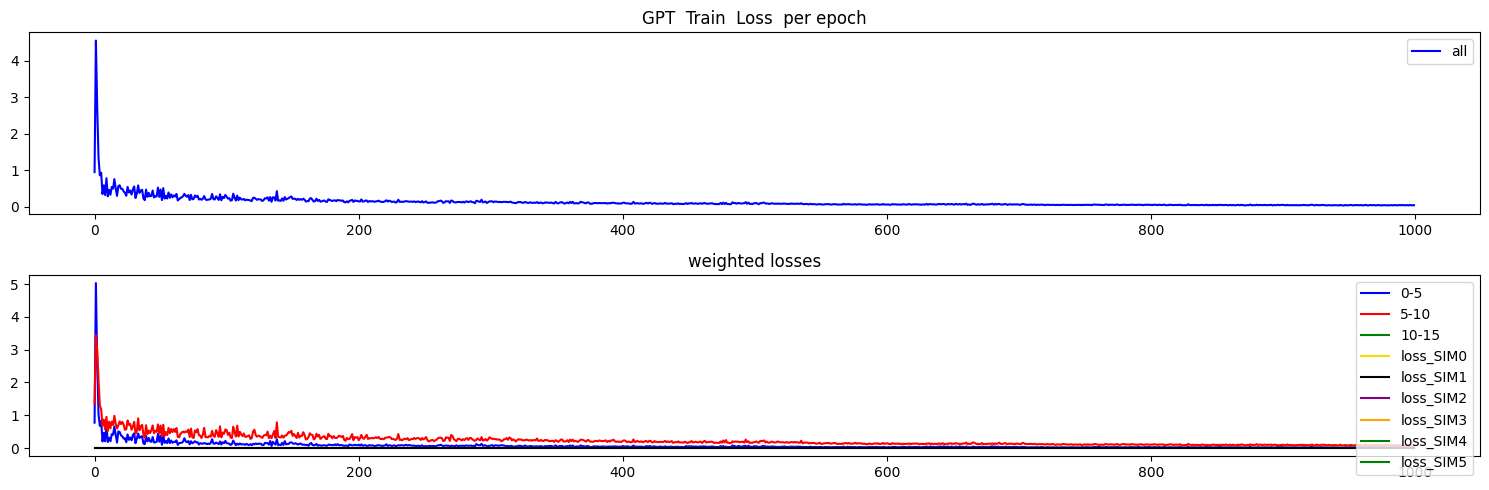

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


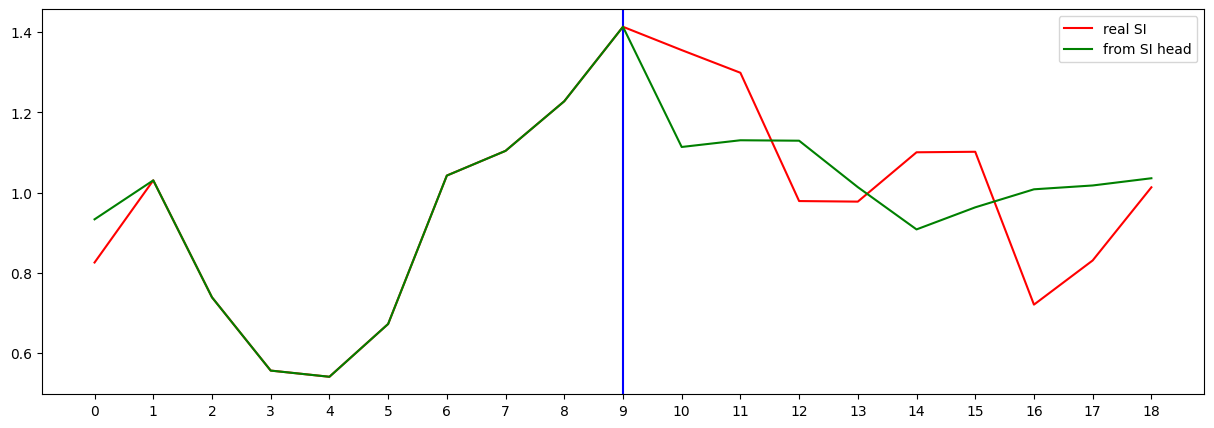

Testing R**2 - (all) - (no inputs):  0.9676221068030915
Testing R**2 - (f2) - SI full (no inputs):  0.04219798420382137
Testing R**2 - SI head only (no inputs):  -0.05889232313607451
0 ...index R**2 (no inputs):  -0.4622067701675423
1 ...index R**2 (no inputs):  -0.01719305044484143
2 ...index R**2 (no inputs):  0.04219798420382137
3 ...index R**2 (no inputs):  -18.347828999912814
4 ...index R**2 (no inputs):  -166.4883957448788
5 ...index R**2 (no inputs):  -1.8546884510994426
6 ...index R**2 (no inputs):  -103.78711167339942
7 ...index R**2 (no inputs):  -72.39514068325305
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.93973557551972
10 ...index R**2 (no inputs):  -1.2509923760379218
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.3632683102839516
16 ...index R**2 (no inputs):  -0.3127635409581926
17 ...index R**2 (no inputs):  -202.9710218

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.891104
Loss_SI: 0.7440264225006104 Loss_all: 1.234285593032837
===
[200] Train Loss: 0.226794
Loss_SI: 0.17176634073257446 Loss_all: 0.35519087314605713
===
[400] Train Loss: 0.176165
Loss_SI: 0.10321368277072906 Loss_all: 0.34638524055480957
===
[600] Train Loss: 0.122590
Loss_SI: 0.06649316847324371 Loss_all: 0.25348228216171265
===
[800] Train Loss: 0.105297
Loss_SI: 0.038289908319711685 Loss_all: 0.26164549589157104
===


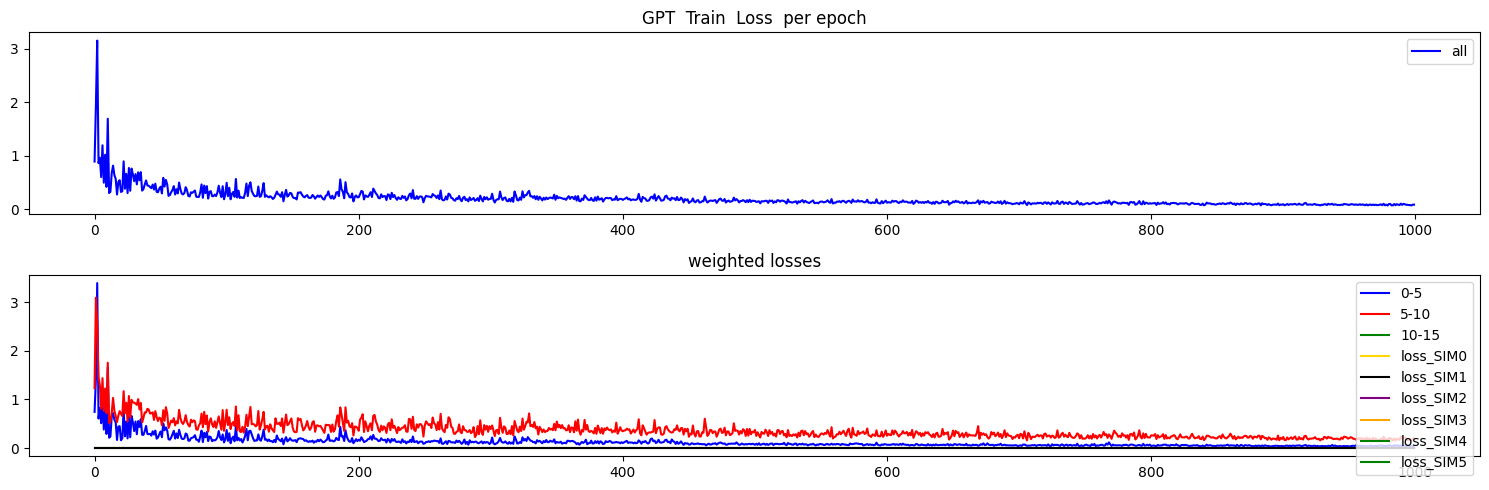

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


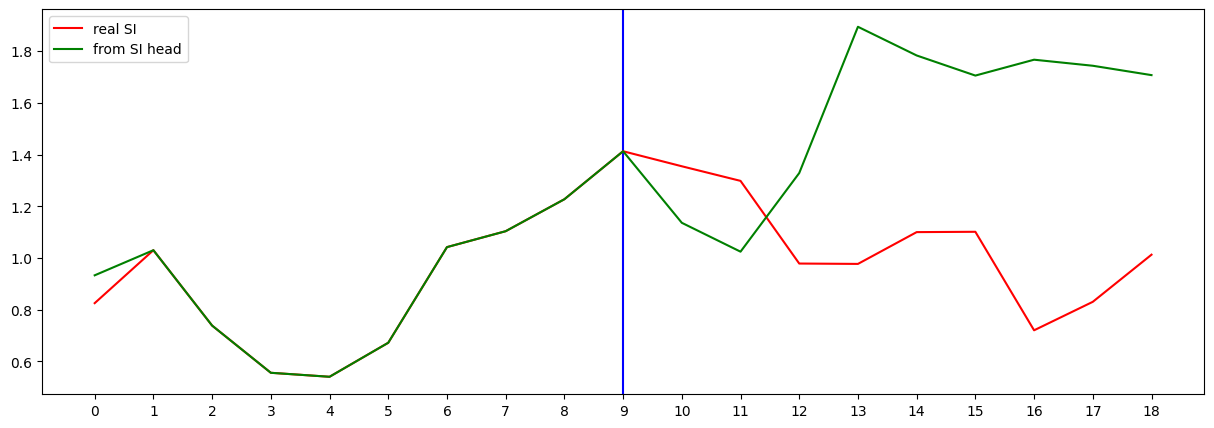

Testing R**2 - (all) - (no inputs):  0.6284355495627805
Testing R**2 - (f2) - SI full (no inputs):  -19.63505479188999
Testing R**2 - SI head only (no inputs):  -16.97811605864629
0 ...index R**2 (no inputs):  -0.6199494698752914
1 ...index R**2 (no inputs):  -1.531065774519492
2 ...index R**2 (no inputs):  -19.63505479188999
3 ...index R**2 (no inputs):  -2.00217879815092
4 ...index R**2 (no inputs):  -14101.999974222294
5 ...index R**2 (no inputs):  -31.668824336453888
6 ...index R**2 (no inputs):  -34.07911151688012
7 ...index R**2 (no inputs):  -318.24838670930046
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6975663221817869
10 ...index R**2 (no inputs):  -0.23951884020074865
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.4194573309120426
16 ...index R**2 (no inputs):  -0.3044264138512849
17 ...index R**2 (no inputs):  -343.73557818537

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.483910
Loss_SI: 1.3318723440170288 Loss_all: 1.8386659622192383
===
[200] Train Loss: 0.534086
Loss_SI: 0.42211660742759705 Loss_all: 0.7953469157218933
===
[400] Train Loss: 0.138439
Loss_SI: 0.0921572670340538 Loss_all: 0.24642878770828247
===
[600] Train Loss: 0.172527
Loss_SI: 0.09844307601451874 Loss_all: 0.34538915753364563
===
[800] Train Loss: 0.109074
Loss_SI: 0.06665481626987457 Loss_all: 0.20805057883262634
===


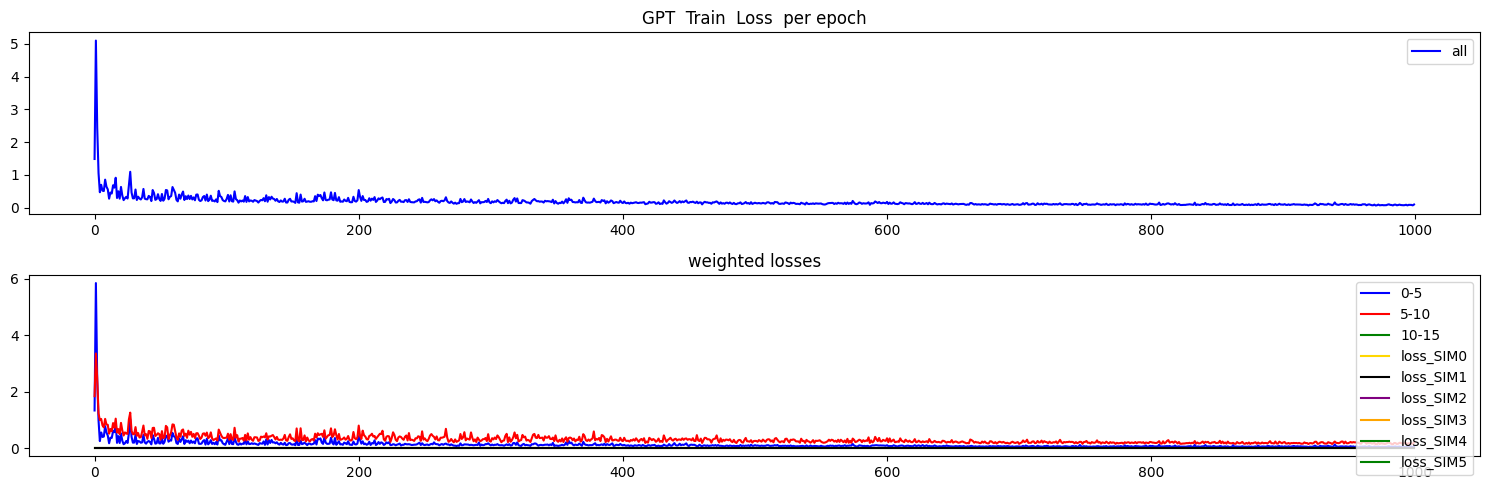

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


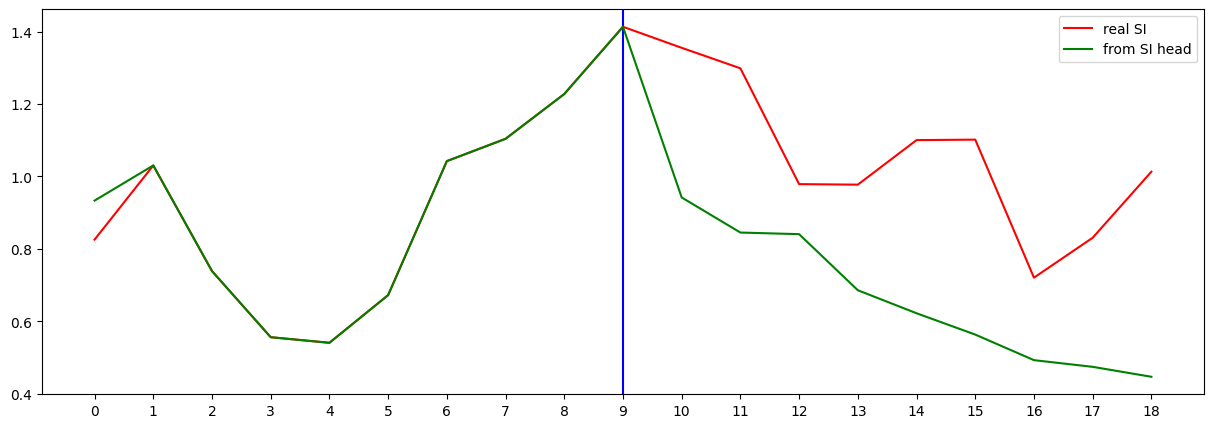

Testing R**2 - (all) - (no inputs):  0.7895731494377586
Testing R**2 - (f2) - SI full (no inputs):  -6.644179079772997
Testing R**2 - SI head only (no inputs):  -3.6395692531642236
0 ...index R**2 (no inputs):  -0.6101766702085689
1 ...index R**2 (no inputs):  0.07207054867022833
2 ...index R**2 (no inputs):  -6.644179079772997
3 ...index R**2 (no inputs):  -24.039876486255746
4 ...index R**2 (no inputs):  -20.86403282915482
5 ...index R**2 (no inputs):  -17.62782272625892
6 ...index R**2 (no inputs):  0.387160260807622
7 ...index R**2 (no inputs):  -6.581892357739527
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.16225874895674797
10 ...index R**2 (no inputs):  0.12224861100305695
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.614150374075372
16 ...index R**2 (no inputs):  0.10930570919428129
17 ...index R**2 (no inputs):  -622.893251555775

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.478894
Loss_SI: 0.32741284370422363 Loss_all: 0.832351565361023
===
[200] Train Loss: 0.087132
Loss_SI: 0.028401214629411697 Loss_all: 0.22417138516902924
===
[400] Train Loss: 0.043635
Loss_SI: 0.015214739367365837 Loss_all: 0.10994917899370193
===
[600] Train Loss: 0.022586
Loss_SI: 0.007013051770627499 Loss_all: 0.058924414217472076
===
[800] Train Loss: 0.026224
Loss_SI: 0.0098472461104393 Loss_all: 0.06443753093481064
===


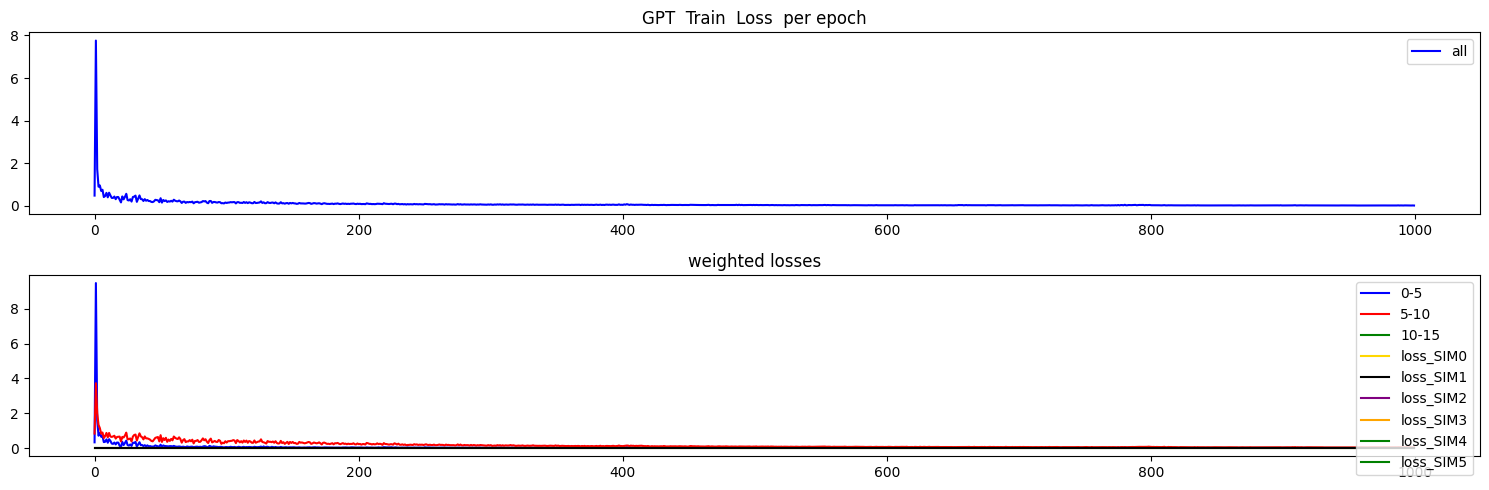

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


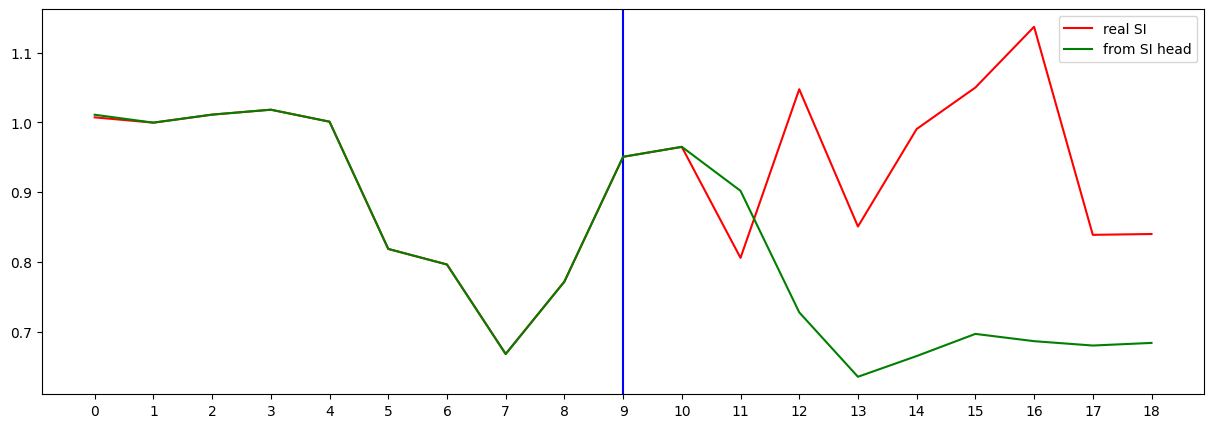

Testing R**2 - (all) - (no inputs):  0.9950722981468603
Testing R**2 - (f2) - SI full (no inputs):  -9.655556479551715
Testing R**2 - SI head only (no inputs):  -4.966921255079532
0 ...index R**2 (no inputs):  -0.2554981743251905
1 ...index R**2 (no inputs):  -1.801200432165591
2 ...index R**2 (no inputs):  -9.655556479551715
3 ...index R**2 (no inputs):  -74.61444918337077
4 ...index R**2 (no inputs):  -21.673465232980185
5 ...index R**2 (no inputs):  -0.7127690469997541
6 ...index R**2 (no inputs):  -58.04502544901208
7 ...index R**2 (no inputs):  -454.11027547943917
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0521207177626768
10 ...index R**2 (no inputs):  -1.4877532453804823
11 ...index R**2 (no inputs):  -24.29288136959076
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.5407255173554866
16 ...index R**2 (no inputs):  -6.250300784722396
17 ...index R**2 (no inputs):  -1

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.892313
Loss_SI: 0.7027455568313599 Loss_all: 1.3346383571624756
===
[200] Train Loss: 0.145128
Loss_SI: 0.10707463324069977 Loss_all: 0.23391762375831604
===
[400] Train Loss: 0.083553
Loss_SI: 0.03736543282866478 Loss_all: 0.19132345914840698
===
[600] Train Loss: 0.063924
Loss_SI: 0.030863389372825623 Loss_all: 0.14106374979019165
===
[800] Train Loss: 0.044117
Loss_SI: 0.019385797902941704 Loss_all: 0.1018240749835968
===


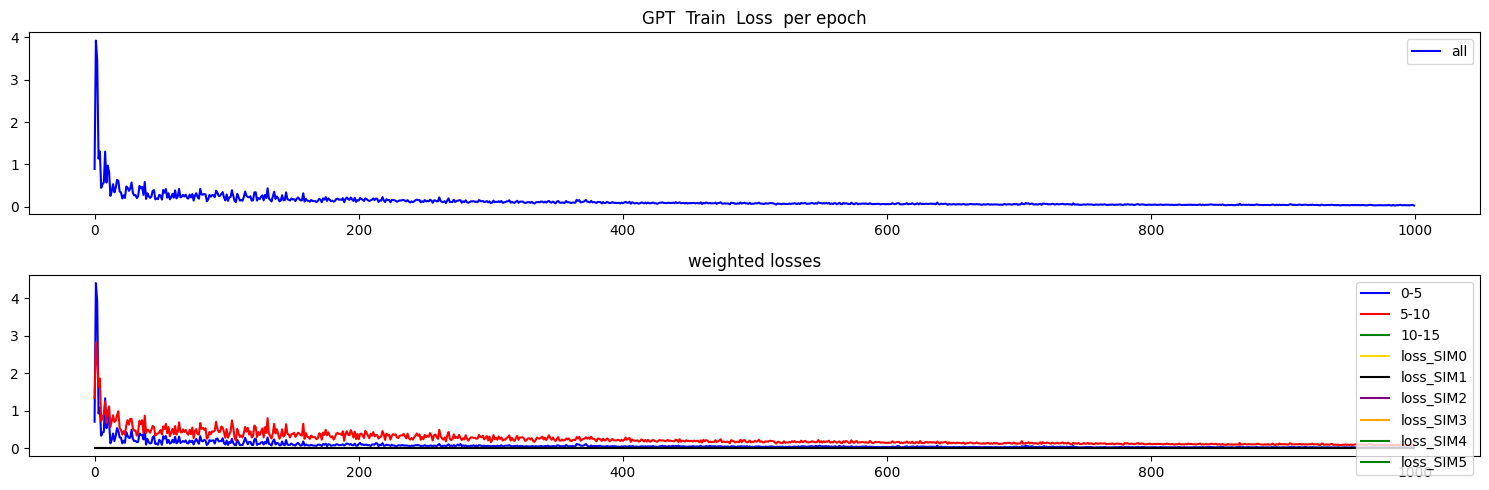

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


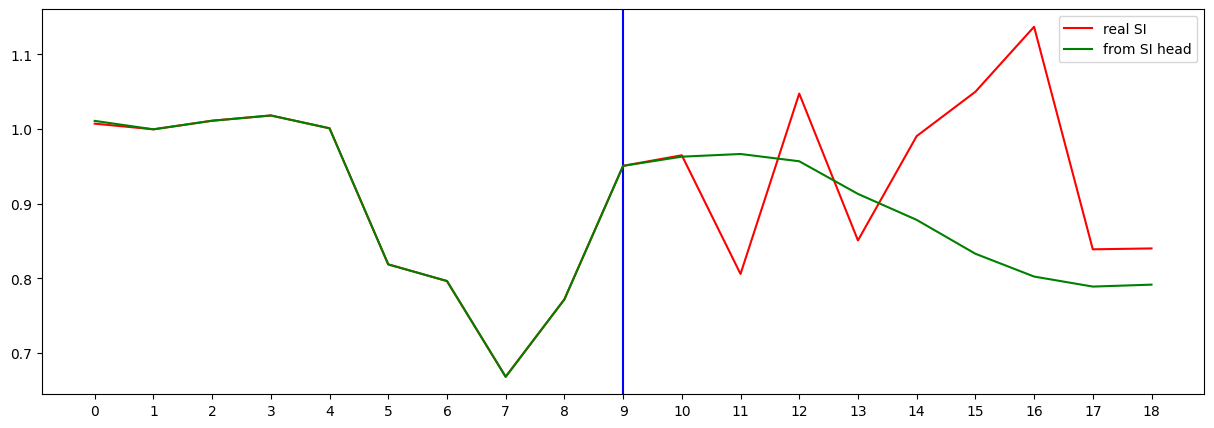

Testing R**2 - (all) - (no inputs):  0.9398914815334272
Testing R**2 - (f2) - SI full (no inputs):  -3.2104588669544825
Testing R**2 - SI head only (no inputs):  -0.9303990472062236
0 ...index R**2 (no inputs):  -0.04321740856441503
1 ...index R**2 (no inputs):  -0.43326463723154385
2 ...index R**2 (no inputs):  -3.2104588669544825
3 ...index R**2 (no inputs):  -25.9103771087149
4 ...index R**2 (no inputs):  -573.8782925525029
5 ...index R**2 (no inputs):  -20.11783707319918
6 ...index R**2 (no inputs):  -4.16146240779893
7 ...index R**2 (no inputs):  -237.89725384761812
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2581344522449347
10 ...index R**2 (no inputs):  -0.4280075967569359
11 ...index R**2 (no inputs):  -0.5391383999958634
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.1421192086363394
16 ...index R**2 (no inputs):  -1.619974383258307
17 ...index R**2 (no inputs): 

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.896236
Loss_SI: 0.6431344747543335 Loss_all: 1.4868054389953613
===
[200] Train Loss: 0.208506
Loss_SI: 0.11865515261888504 Loss_all: 0.41815638542175293
===
[400] Train Loss: 0.110672
Loss_SI: 0.06818485260009766 Loss_all: 0.2098088264465332
===
[600] Train Loss: 0.229117
Loss_SI: 0.1963788866996765 Loss_all: 0.30550646781921387
===
[800] Train Loss: 0.089203
Loss_SI: 0.04133465141057968 Loss_all: 0.20089638233184814
===


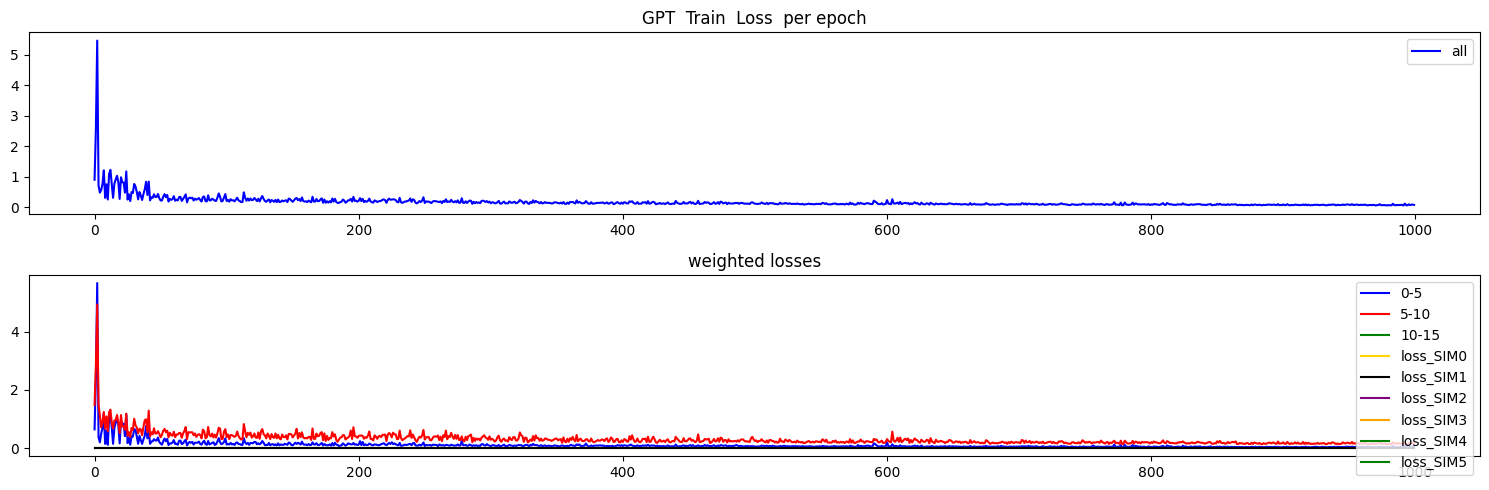

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


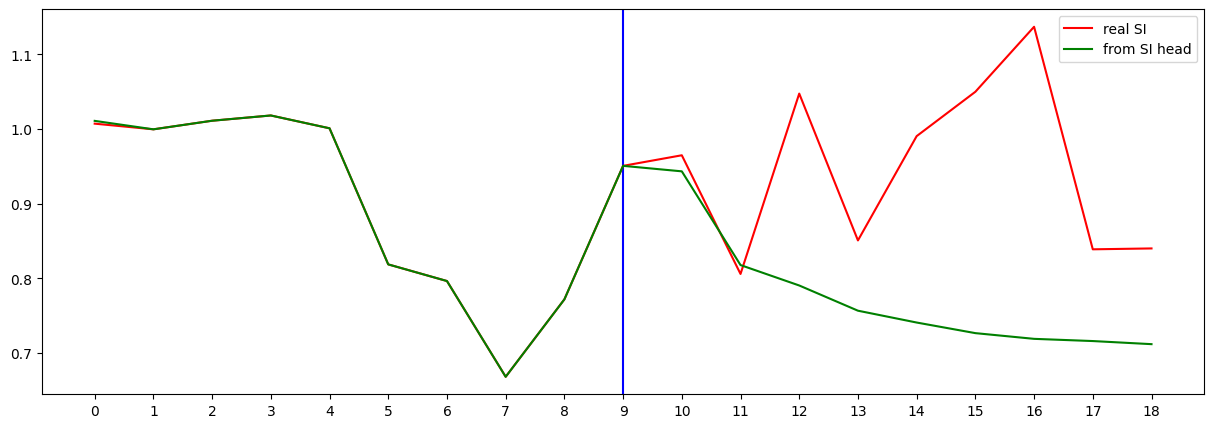

Testing R**2 - (all) - (no inputs):  0.9204060931363003
Testing R**2 - (f2) - SI full (no inputs):  -7.578953681256085
Testing R**2 - SI head only (no inputs):  -3.4674148103621585
0 ...index R**2 (no inputs):  -0.1091792578055446
1 ...index R**2 (no inputs):  -1.4731789254154197
2 ...index R**2 (no inputs):  -7.578953681256085
3 ...index R**2 (no inputs):  -70.0136191851492
4 ...index R**2 (no inputs):  -478.72143153833287
5 ...index R**2 (no inputs):  -25.097234210302812
6 ...index R**2 (no inputs):  -95.52864169276573
7 ...index R**2 (no inputs):  -364.0575507600155
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6608141793268774
10 ...index R**2 (no inputs):  -2.270588411877838
11 ...index R**2 (no inputs):  -161.0836194299627
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8089492079187672
16 ...index R**2 (no inputs):  -0.39376360682704226
17 ...index R**2 (no inputs):  -

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.794860
Loss_SI: 0.6192317008972168 Loss_all: 1.204657793045044
===
[200] Train Loss: 0.197485
Loss_SI: 0.10375207662582397 Loss_all: 0.4161960184574127
===
[400] Train Loss: 0.115560
Loss_SI: 0.06429634988307953 Loss_all: 0.23517650365829468
===
[600] Train Loss: 0.104889
Loss_SI: 0.05502597242593765 Loss_all: 0.22123666107654572
===
[800] Train Loss: 0.116508
Loss_SI: 0.0568569116294384 Loss_all: 0.2556940019130707
===


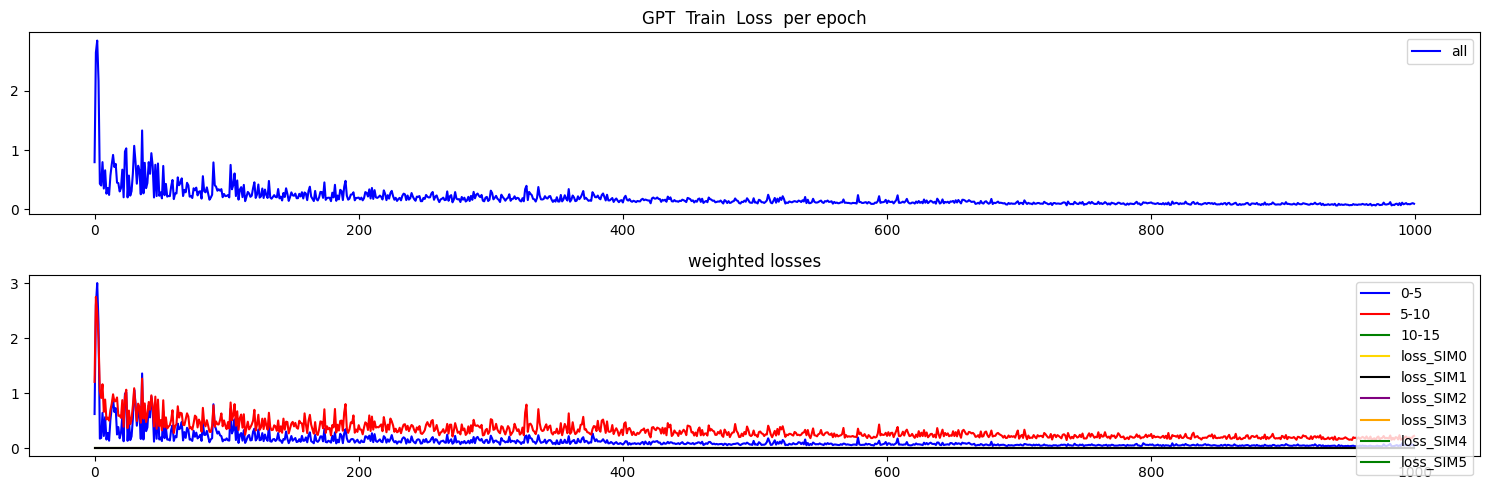

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


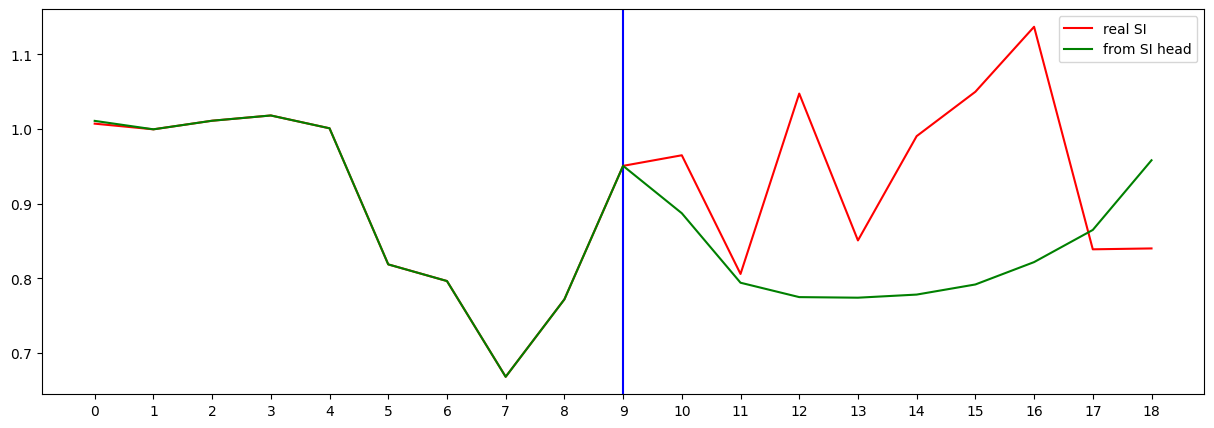

Testing R**2 - (all) - (no inputs):  0.9150675685653882
Testing R**2 - (f2) - SI full (no inputs):  -5.526749330100041
Testing R**2 - SI head only (no inputs):  -1.7950407074752306
0 ...index R**2 (no inputs):  -0.21645860559106334
1 ...index R**2 (no inputs):  -0.47320174161759
2 ...index R**2 (no inputs):  -5.526749330100041
3 ...index R**2 (no inputs):  -215.2808832102233
4 ...index R**2 (no inputs):  -349.7719144733852
5 ...index R**2 (no inputs):  -14.06510624841842
6 ...index R**2 (no inputs):  -315.2251618392276
7 ...index R**2 (no inputs):  -5264.9134633584
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1860044748966072
10 ...index R**2 (no inputs):  -1.2660548583740954
11 ...index R**2 (no inputs):  -691.6513519287109
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -13.577158251709745
16 ...index R**2 (no inputs):  0.28720708369538417
17 ...index R**2 (no inputs):  -1666

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.704501
Loss_SI: 0.5387980937957764 Loss_all: 1.0911420583724976
===
[200] Train Loss: 0.066607
Loss_SI: 0.02235434204339981 Loss_all: 0.1698625087738037
===
[400] Train Loss: 0.039216
Loss_SI: 0.017870619893074036 Loss_all: 0.08902040868997574
===
[600] Train Loss: 0.023436
Loss_SI: 0.010490281507372856 Loss_all: 0.05364257097244263
===
[800] Train Loss: 0.020289
Loss_SI: 0.008961767889559269 Loss_all: 0.04672004655003548
===


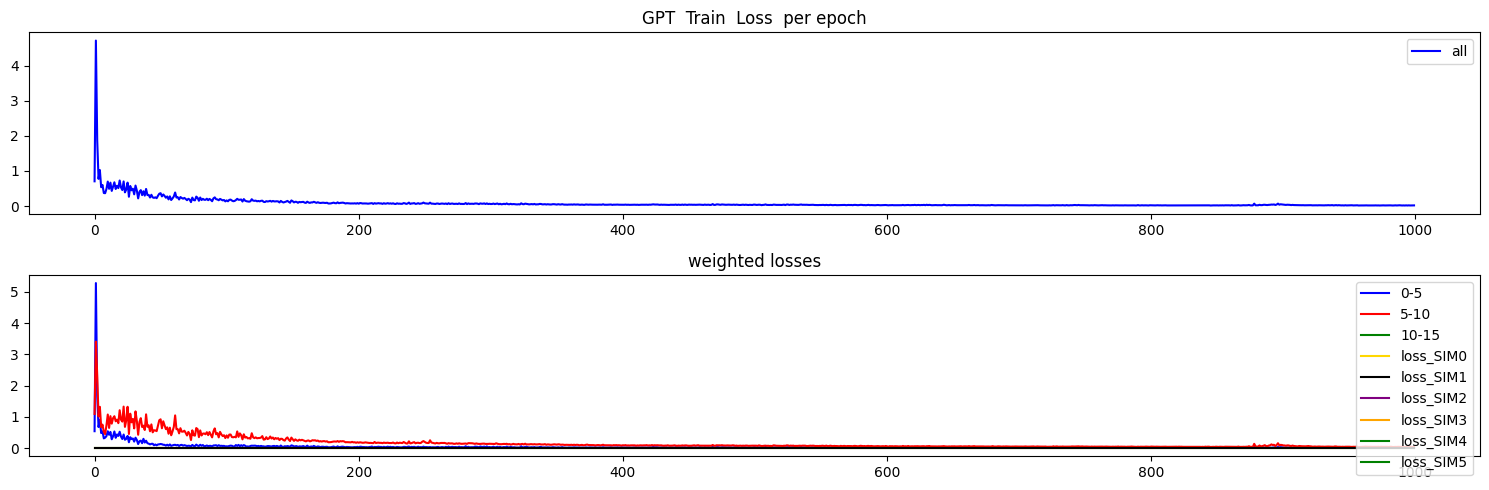

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


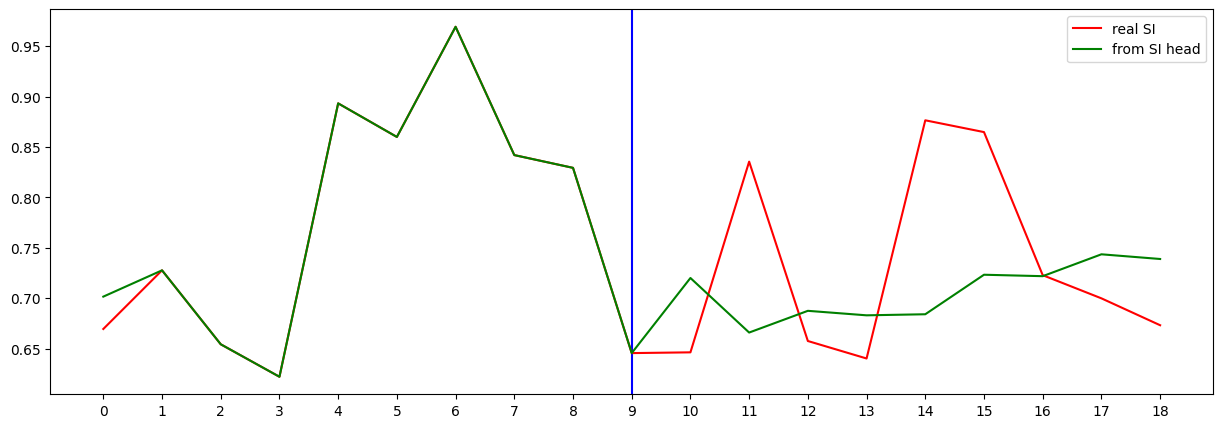

Testing R**2 - (all) - (no inputs):  0.9995220311253876
Testing R**2 - (f2) - SI full (no inputs):  -1.0519039083966093
Testing R**2 - SI head only (no inputs):  -0.3445664252672327
0 ...index R**2 (no inputs):  -0.25722810258039064
1 ...index R**2 (no inputs):  -2.424760121020484
2 ...index R**2 (no inputs):  -1.0519039083966093
3 ...index R**2 (no inputs):  -4.994605918894745
4 ...index R**2 (no inputs):  -0.9523546441566608
5 ...index R**2 (no inputs):  -2.8640508009827514
6 ...index R**2 (no inputs):  -13.89311109188695
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8042175222426575
10 ...index R**2 (no inputs):  -0.5485546728803508
11 ...index R**2 (no inputs):  -11.495740598161019
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2482371359998585
16 ...index R**2 (no inputs):  -0.1920206121678607
17 ...index R**2 (no inputs):  0.4317424812

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.231997
Loss_SI: 1.1193815469741821 Loss_all: 1.4947664737701416
===
[200] Train Loss: 0.377517
Loss_SI: 0.18930962681770325 Loss_all: 0.816667377948761
===
[400] Train Loss: 0.091718
Loss_SI: 0.03943948075175285 Loss_all: 0.21370121836662292
===
[600] Train Loss: 0.087923
Loss_SI: 0.03792708367109299 Loss_all: 0.20458173751831055
===
[800] Train Loss: 0.052369
Loss_SI: 0.020543422549962997 Loss_all: 0.12662716209888458
===


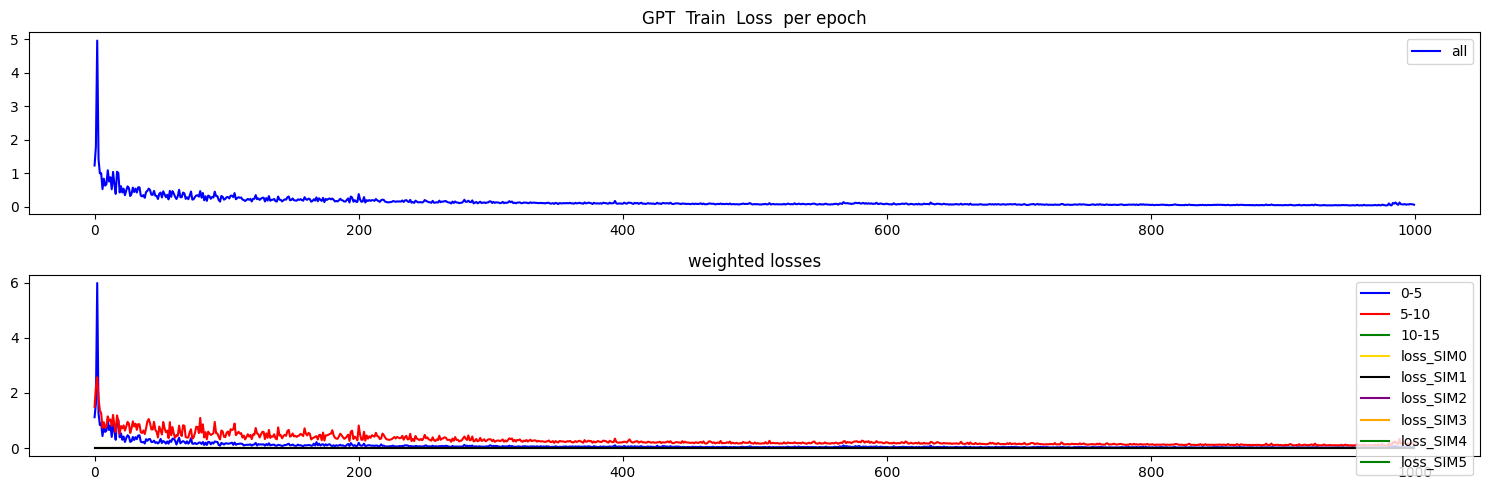

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


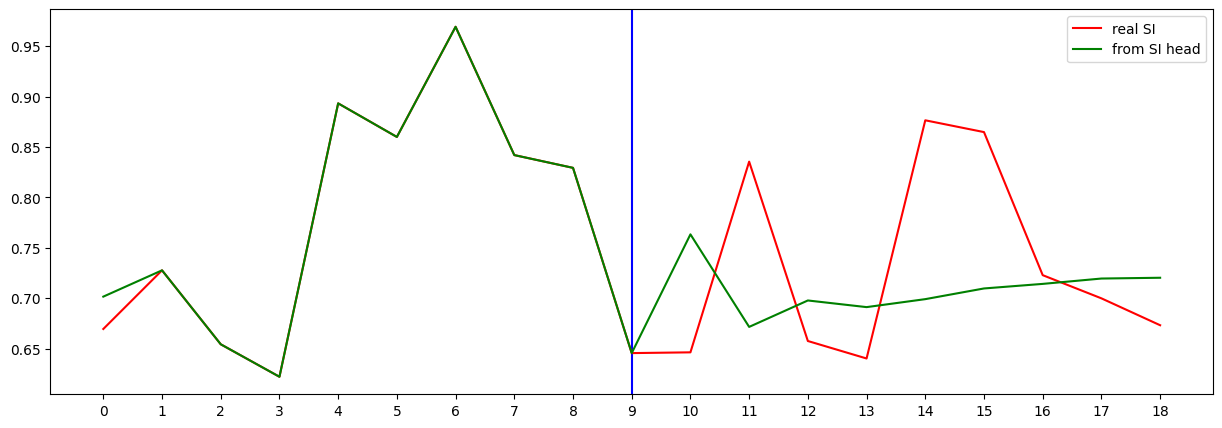

Testing R**2 - (all) - (no inputs):  0.9981357095101955
Testing R**2 - (f2) - SI full (no inputs):  -1.0382222300579005
Testing R**2 - SI head only (no inputs):  -0.05959496158077937
0 ...index R**2 (no inputs):  0.14895862245796243
1 ...index R**2 (no inputs):  -1.577380391596792
2 ...index R**2 (no inputs):  -1.0382222300579005
3 ...index R**2 (no inputs):  -15.600551169712276
4 ...index R**2 (no inputs):  -22.70513007031946
5 ...index R**2 (no inputs):  -15.126025102974697
6 ...index R**2 (no inputs):  -20.781830675923704
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4495663146131854
10 ...index R**2 (no inputs):  -0.14621587832558713
11 ...index R**2 (no inputs):  -35.06461329499032
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8698913001287893
16 ...index R**2 (no inputs):  -0.2120063839984372
17 ...index R**2 (no inputs):  -3.78979156

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.607200
Loss_SI: 0.429546982049942 Loss_all: 1.0217251777648926
===
[200] Train Loss: 0.219880
Loss_SI: 0.11728818714618683 Loss_all: 0.45925989747047424
===
[400] Train Loss: 0.170625
Loss_SI: 0.09568788856267929 Loss_all: 0.3454783260822296
===
[600] Train Loss: 0.085453
Loss_SI: 0.0423150435090065 Loss_all: 0.18610748648643494
===
[800] Train Loss: 0.079428
Loss_SI: 0.03614787757396698 Loss_all: 0.18041546642780304
===


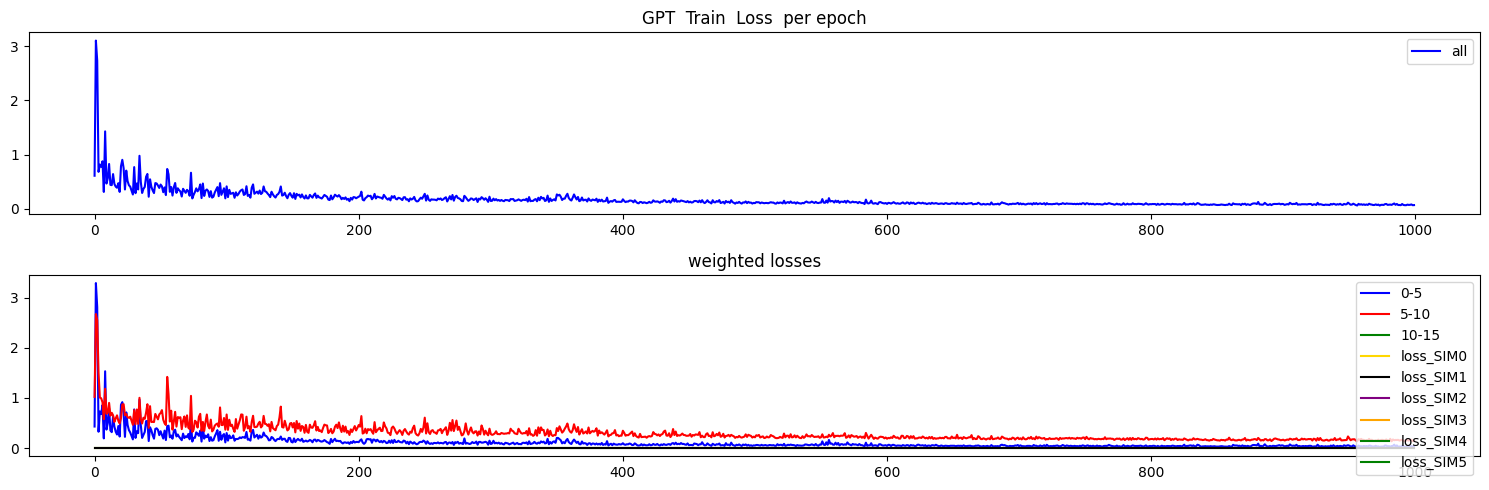

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


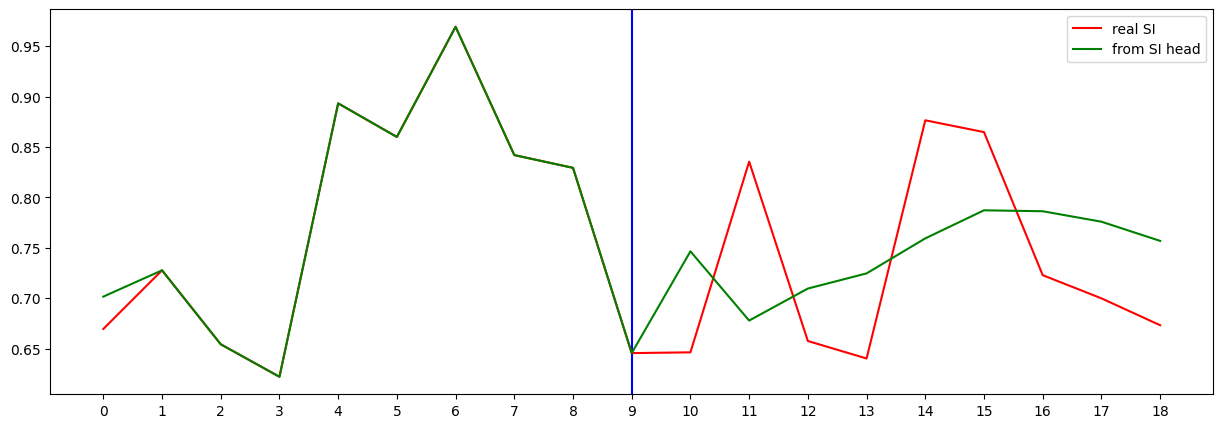

Testing R**2 - (all) - (no inputs):  0.9996426101495457
Testing R**2 - (f2) - SI full (no inputs):  -1.1484755999964196
Testing R**2 - SI head only (no inputs):  -0.08047608621911628
0 ...index R**2 (no inputs):  0.02928887147226167
1 ...index R**2 (no inputs):  -3.732341691354181
2 ...index R**2 (no inputs):  -1.1484755999964196
3 ...index R**2 (no inputs):  -21.790431779305198
4 ...index R**2 (no inputs):  -30.90422843619324
5 ...index R**2 (no inputs):  -1.8330212956153136
6 ...index R**2 (no inputs):  -27.033908890119765
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.50470992094207
10 ...index R**2 (no inputs):  -0.07537579475069989
11 ...index R**2 (no inputs):  -38.894337267828256
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8112479764803855
16 ...index R**2 (no inputs):  -0.23781119533675765
17 ...index R**2 (no inputs):  -25.4334405

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.059791
Loss_SI: 0.960473895072937 Loss_all: 1.2915302515029907
===
[200] Train Loss: 0.347088
Loss_SI: 0.215223029255867 Loss_all: 0.6547731161117554
===
[400] Train Loss: 0.195565
Loss_SI: 0.132346972823143 Loss_all: 0.34307318925857544
===
[600] Train Loss: 0.123538
Loss_SI: 0.05756336450576782 Loss_all: 0.2774796485900879
===
[800] Train Loss: 0.104589
Loss_SI: 0.0551658570766449 Loss_all: 0.21990938484668732
===


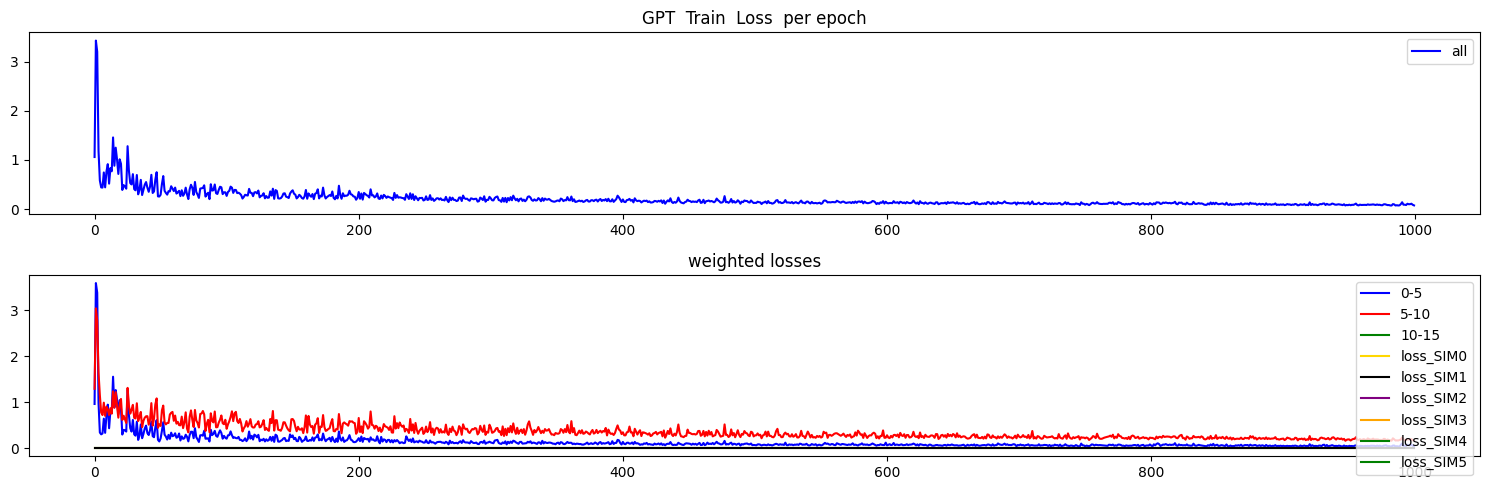

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


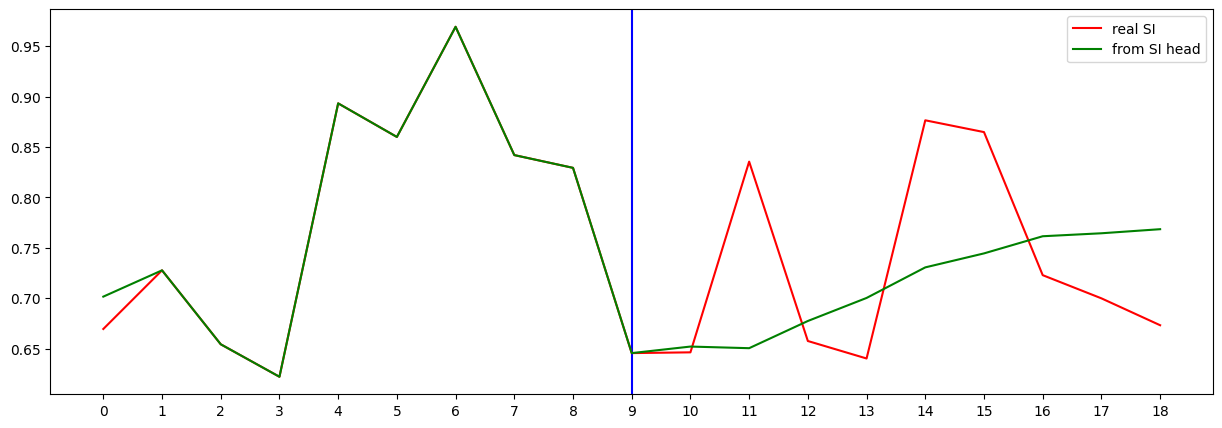

Testing R**2 - (all) - (no inputs):  0.9993555482971755
Testing R**2 - (f2) - SI full (no inputs):  -2.406701095101344
Testing R**2 - SI head only (no inputs):  -0.4926846534306075
0 ...index R**2 (no inputs):  -0.4211254441740917
1 ...index R**2 (no inputs):  -3.873545704619792
2 ...index R**2 (no inputs):  -2.406701095101344
3 ...index R**2 (no inputs):  -19.625484212944468
4 ...index R**2 (no inputs):  -10.775846398193247
5 ...index R**2 (no inputs):  -4.033811987480688
6 ...index R**2 (no inputs):  -719.5104747063014
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4534157450295757
10 ...index R**2 (no inputs):  -0.7049111095629947
11 ...index R**2 (no inputs):  -52.45257619843956
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.04836255027698877
16 ...index R**2 (no inputs):  -0.08086582644244467
17 ...index R**2 (no inputs):  -323.7352714820

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: 0.5694548261617591


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.4140744340262036


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.10821836628099168


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: 0.2767179214485729



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: 0.9388901921256004
2 .....R² on first n steps: 0.7997507535459496
3 .....R² on first n steps: 0.5632634143780767
4 .....R² on first n steps: 0.5795639852225909
5 .....R² on first n steps: 0.5784867183034117
6 .....R² on first n steps: 0.5743972462384861
7 .....R² on first n steps: 0.5674065452145582
8 .....R² on first n steps: 0.5654688159729149
9 .....R² on first n steps: 0.5694548261617591


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: 0.7963441730973391
2 .....R² on first n steps: 0.7125319237705908
3 .....R² on first n steps: 0.4877201027905417
4 .....R² on first n steps: 0.5416783186341083
5 .....R² on first n steps: 0.5596135177504531
6 .....R² on first n steps: 0.5559275329620617
7 .....R² on first n steps: 0.42473236830999384
8 .....R² on first n steps: 0.43953481583567666
9 .....R² on first n steps: 0.4140744340262036


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: 0.9084388735468506
2 .....R² on first n steps: 0.7748454197115358
3 .....R² on first n steps: 0.4563192787055381
4 .....R² on first n steps: 0.3358068349105796
5 .....R² on first n steps: 0.3011502432981549
6 .....R² on first n steps: 0.1683375792047046
7 .....R² on first n steps: -0.005576170685186899
8 .....R² on first n steps: -0.03246100847533362
9 .....R² on first n steps: -0.10821836628099168


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: 0.7293771050854028
2 .....R² on first n steps: 0.7872471517536999
3 .....R² on first n steps: 0.7666372926628942
4 .....R² on first n steps: 0.6423410567430465
5 .....R² on first n steps: 0.45908657067783865
6 .....R² on first n steps: 0.4057947970869745
7 .....R² on first n steps: 0.4197894371817854
8 .....R² on first n steps: 0.34230565998180396
9 .....R² on first n steps: 0.2767179214485729



## Plot


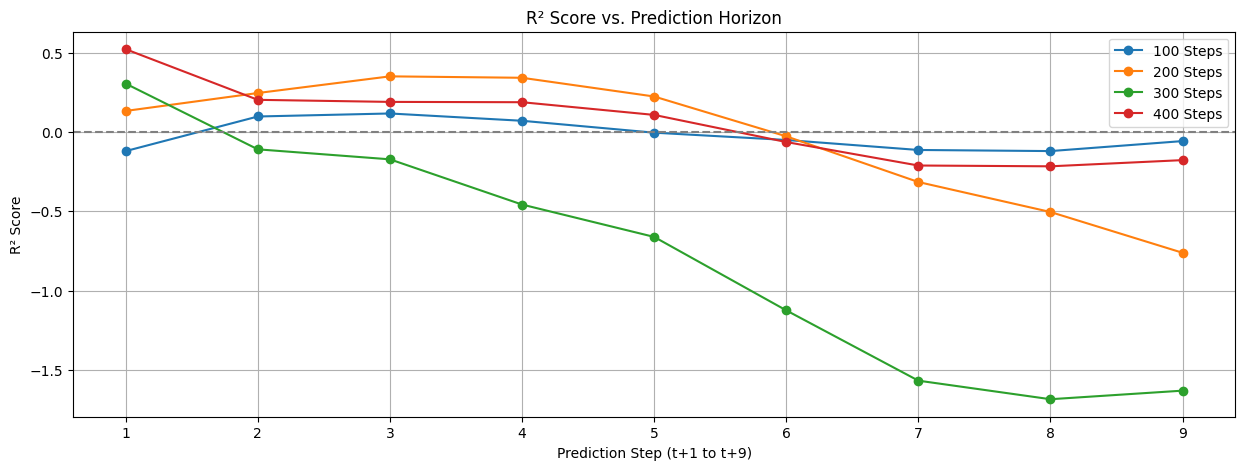

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
